In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# working_dir = '/content/drive/MyDrive/bike-sharing'
# archive_file = os.path.join(working_dir, 'capital-bike-share-2010-2023.csv.tar.gz')
# data_file = os.path.join(working_dir, 'capital-bike-share-2010-2023.csv')

working_dir = 'data'
archive_file = os.path.join(working_dir, 'capital-bike-share-2010-2023.csv.tar.gz')
data_file = os.path.join(working_dir, 'capital-bike-share-2010-2023-reduced.csv')
data_file_grouped = os.path.join(working_dir, 'capital-bike-share-2010-2023-grouped.csv')
data_file_bike_numbers = os.path.join(working_dir, 'capital-bike-share-2010-2023-bike-numbers.csv')

In [12]:
color_reg = '#037ffc'
color_cas = '#cc0000'
color_general = '#8c52ff'
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weather_colors = {
    'dry': '#fcbe03',
    'rain': '#4d52b3',
    'snow': '#afd0db',
}
weather_color_palette = [
    weather_colors['dry'],
    weather_colors['snow'],
    weather_colors['rain']
]
season_colors = {
    'winter': '#8fc7e3',
    'spring': '#73ff9f',
    'summer': '#d2ff96',
    'fall': '#f59e42'
}
season_color_palette = [
    season_colors['winter'],
    season_colors['spring'],
    season_colors['summer'],
    season_colors['fall']
]


def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)

    return my_autopct

In [13]:
# extract bike share data set
# import tarfile
# # open file
# file = tarfile.open(archive_file)
# # extracting file
# file.extractall(working_dir)
# file.close()

In [14]:
# load the dataset
# b = pd.read_csv(data_file)

In [15]:
bg = pd.read_csv(data_file_grouped)

In [16]:
bns = pd.read_csv(data_file_bike_numbers)
bns = bns.astype({
    'first_trip_date': 'datetime64',
    'last_trip_date': 'datetime64'
})
bns['days_active'] = (bns['last_trip_date'] - bns['first_trip_date']).dt.days
display(bns.head())

number  type  total_trip_count  casual_trip_count  member_trip_count  \
0  W00824   NaN              4892               1047               3845   
1  W00772   NaN              9036               1930               7106   
2  W00886   NaN              8754               1816               6938   
3  W00777   NaN              9138               1917               7221   
4  W00289   NaN              7795               1570               6225   

   total_duration     first_trip_date      last_trip_date  days_active  
0         5186176 2010-09-20 18:15:58 2020-03-04 12:36:25         3452  
1        10113917 2010-09-20 21:45:02 2020-03-28 16:40:42         3476  
2         9974503 2010-09-21 12:09:15 2020-03-29 19:13:48         3477  
3         9851299 2010-09-21 17:46:26 2020-03-30 18:13:44         3478  
4         8261128 2010-09-21 20:57:07 2020-03-27 16:56:17         3474

In [17]:
#display(b.info())

In [18]:
# display first 5 records
# display(b.head())

In [19]:
# b = b[b.duration > 0]

In [20]:
# display dataset shape
# display(b.shape)

In [21]:
# display fields with types
# display(b.dtypes)

In [22]:
# display(b.info())

In [23]:
# display statistics
# display(b.describe())

In [24]:
# find missing values in the dataset
# missing_count = b.isnull().sum()
# values_count = b.isnull().count()
# missing_percentage = (missing_count / values_count * 100)
# missing_df = pd.DataFrame({
#     'missing_count': missing_count,
#     'missing_percentage': missing_percentage
# })
# display(missing_count)
# display(missing_df)

In [25]:
# cast data types in the dataset
# b['start_time'] = pd.to_datetime(b['start_time'])
# b['end_time'] = pd.to_datetime(b['end_time'])
# b['is_member'] = b['is_member'].astype('bool')
# b['rideable_type'] = b['rideable_type'].astype('category')

In [26]:
# find duplicates in the dataset
# display(b.duplicated().sum())

# remove duplicates and outliers

In [27]:
display(bg.head())

time  temp  humidity  atemp  pressure  precipitation  rain  \
0  2010-09-20 00:00:00  11.9      72.0    8.9    1010.6            0.0   0.0   
1  2010-09-20 01:00:00  12.0      77.0    9.3    1010.7            0.0   0.0   
2  2010-09-20 02:00:00  13.4      72.0   10.7    1011.1            0.0   0.0   
3  2010-09-20 03:00:00  14.8      68.0   12.1    1011.0            0.0   0.0   
4  2010-09-20 04:00:00  15.8      65.0   13.1    1010.9            0.0   0.0   

   snowfall  wmo_code wmo_description  ...  weekday  month  year season  \
0       0.0       2.0             dry  ...   Monday      9  2010      4   
1       0.0       2.0             dry  ...   Monday      9  2010      4   
2       0.0       2.0             dry  ...   Monday      9  2010      4   
3       0.0       3.0             dry  ...   Monday      9  2010      4   
4       0.0       3.0             dry  ...   Monday      9  2010      4   

  total_trips  casual_trips  member_trips  total_trip_duration  \
0           0             0             0                    0   
1           0             0             0                    0   
2           0             0             0                    0   
3           0             0             0                    0   
4           0             0             0                    0   

   total_member_trip_duration  total_casual_trip_duration  
0                           0                           0  
1                           0                           0  
2                           0                           0  
3                           0                           0  
4                           0                           0  

[5 rows x 24 columns]

In [28]:
# from scipy import stats
# # remove duplicates and outliers
# print('before: ', b.shape)
#
# b = b.drop_duplicates()
# b = b[b.duration > 0]
# b = b[(np.abs(stats.zscore(b['duration'])) < 3)]
#
# print('after: ', b.shape)

# Feature engineering

## CO2 emissions
The average passenger vehicle in US emits about 251 grams of CO2 per km

## Cost per capture
135$ - 350$ per ton of CO2 captured
https://www.iea.org/commentaries/is-carbon-capture-too-expensive

## Average speed
Currently, Capital Bikeshare uses an average speed of roughly 12.07 KPH to estimate distances
https://mobilitylab.org/2016/06/21/capital-bikeshare-gps-data-trips/

In [29]:
bg = bg[bg['total_trip_duration'] > 0]
bg['total_distance'] = bg['total_trip_duration'] * 12.07 / 3600
bg['total_co2_saved'] = bg['total_distance'] * 251 / 1000

bg['total_casual_distance'] = bg['total_casual_trip_duration'] * 12.07 / 3600
bg['total_casual_co2_saved'] = bg['total_casual_distance'] * 251 / 1000

bg['total_member_distance'] = bg['total_member_trip_duration'] * 12.07 / 3600
bg['total_member_co2_saved'] = bg['total_member_distance'] * 251 / 1000

In [30]:
pd.set_option('float_format', '{:f}'.format)
display(bg['total_co2_saved'].describe())

count   108399.000000
mean       340.697955
std        557.002721
min          0.053859
25%         42.404302
50%        178.492166
75%        463.456465
max      28391.763367
Name: total_co2_saved, dtype: float64

In [31]:
# only casual riders
#b_cas = b[b['is_member'] == False]

<AxesSubplot: ylabel='total_co2_saved'>

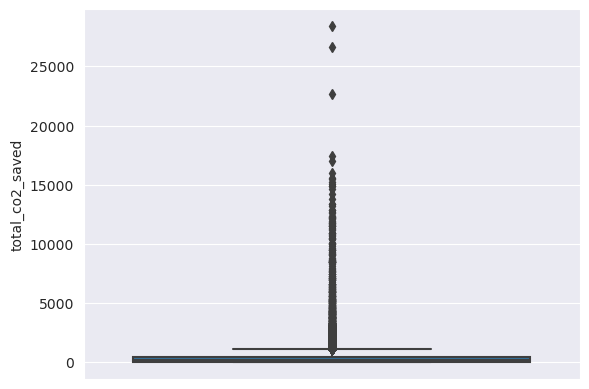

In [32]:
sns.boxplot(data=bg, y='total_co2_saved')

# univariate analysis

/tmp/ipykernel_3129/2055696351.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(column)


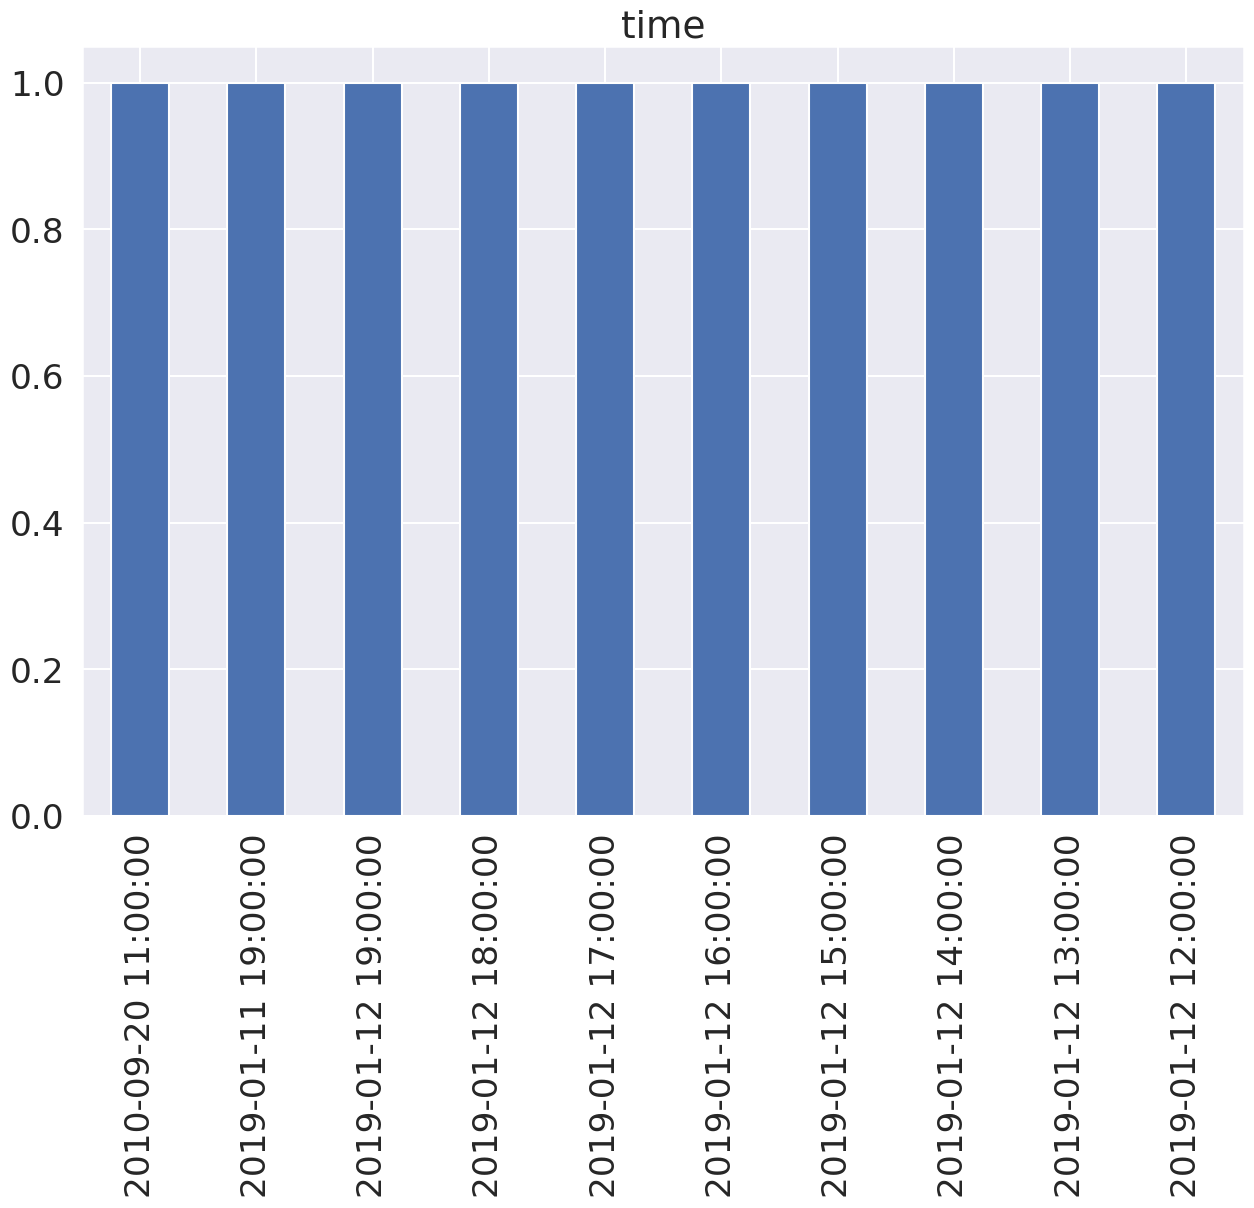

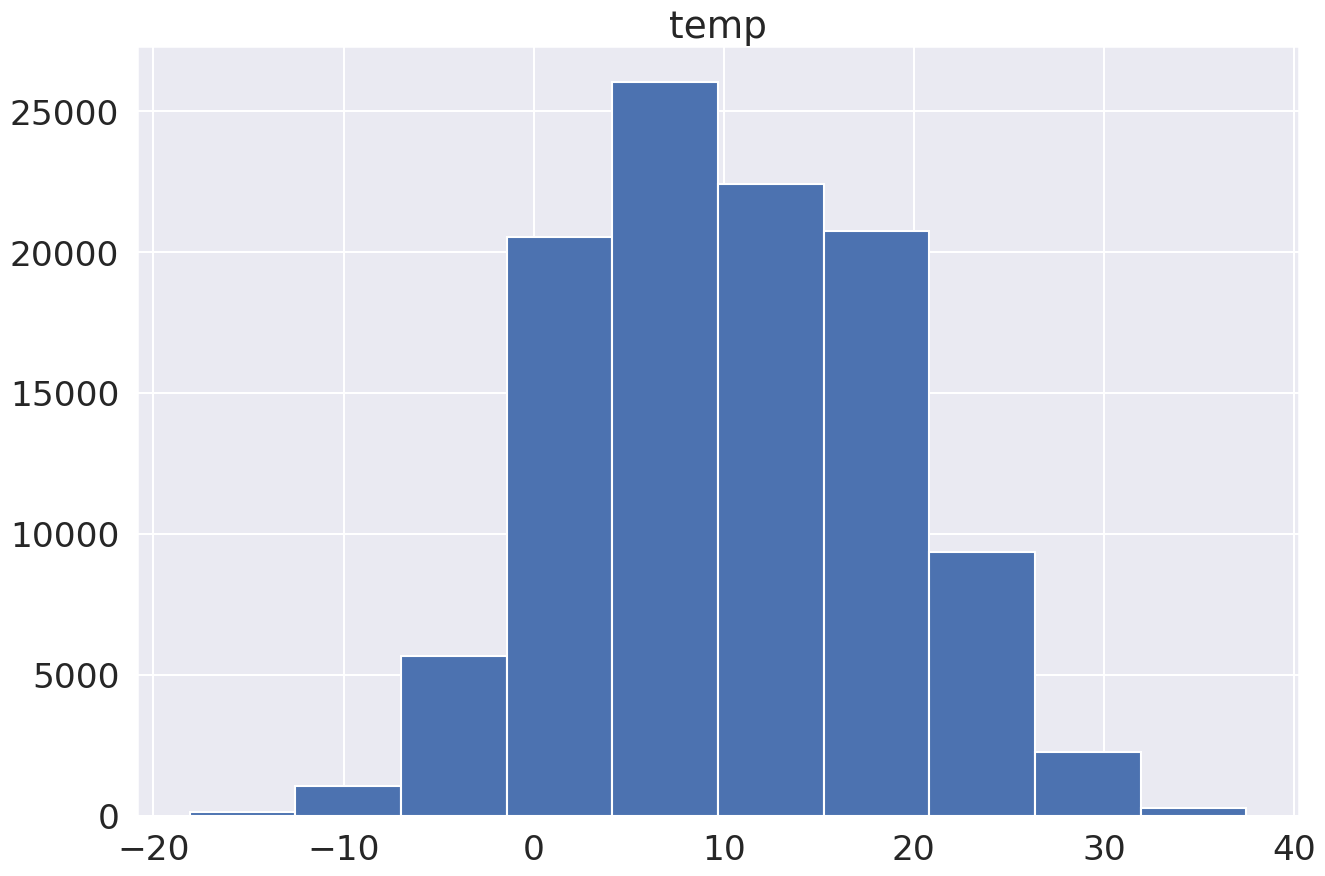

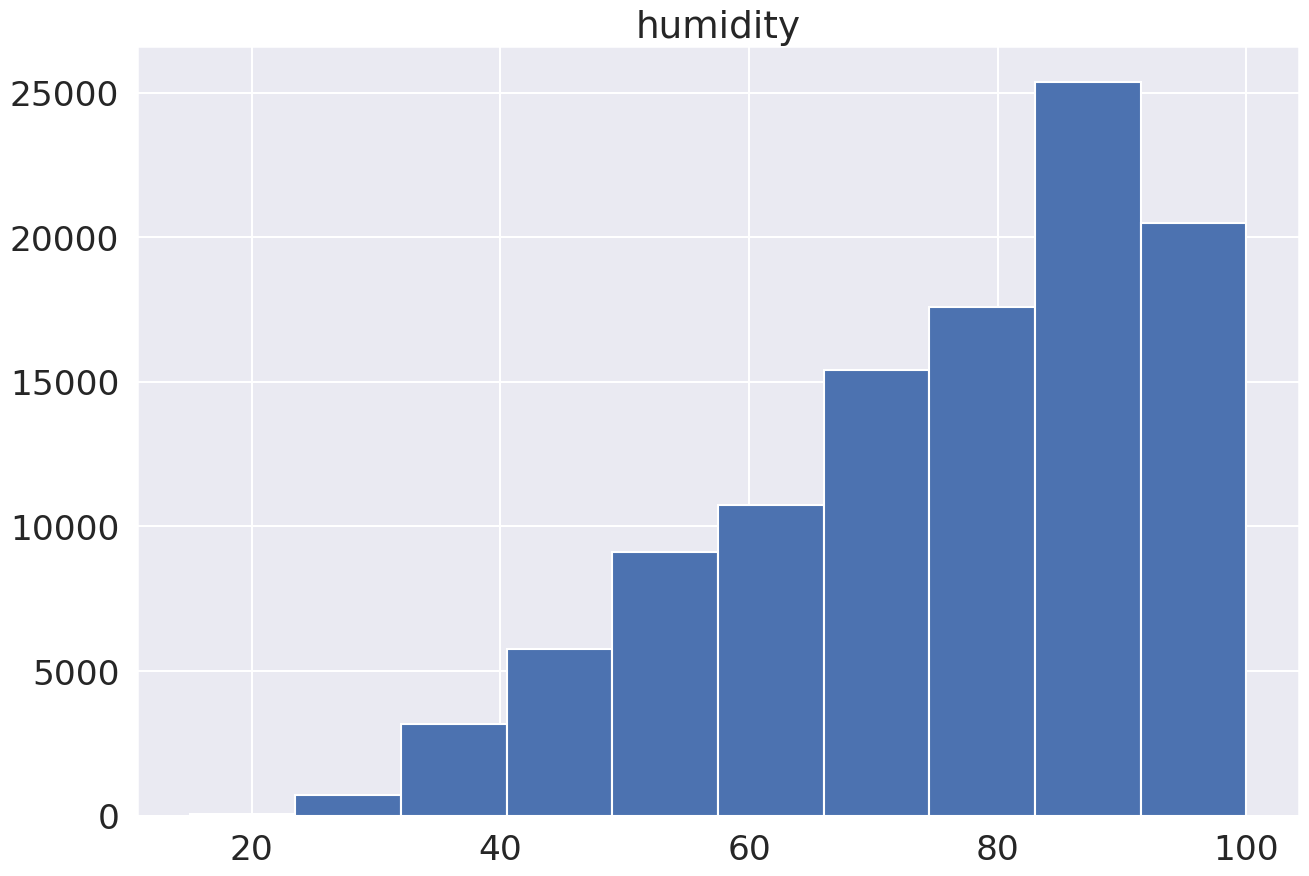

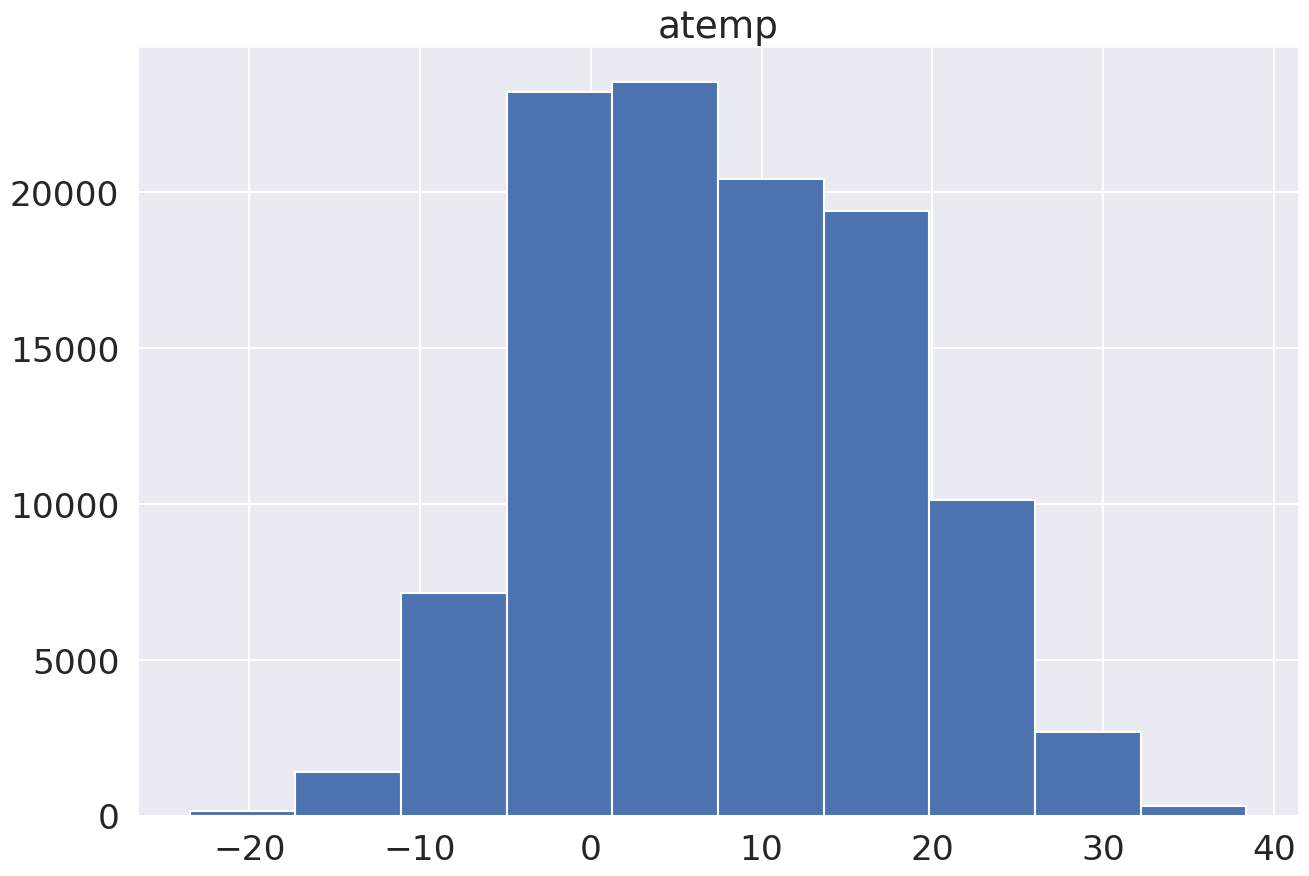

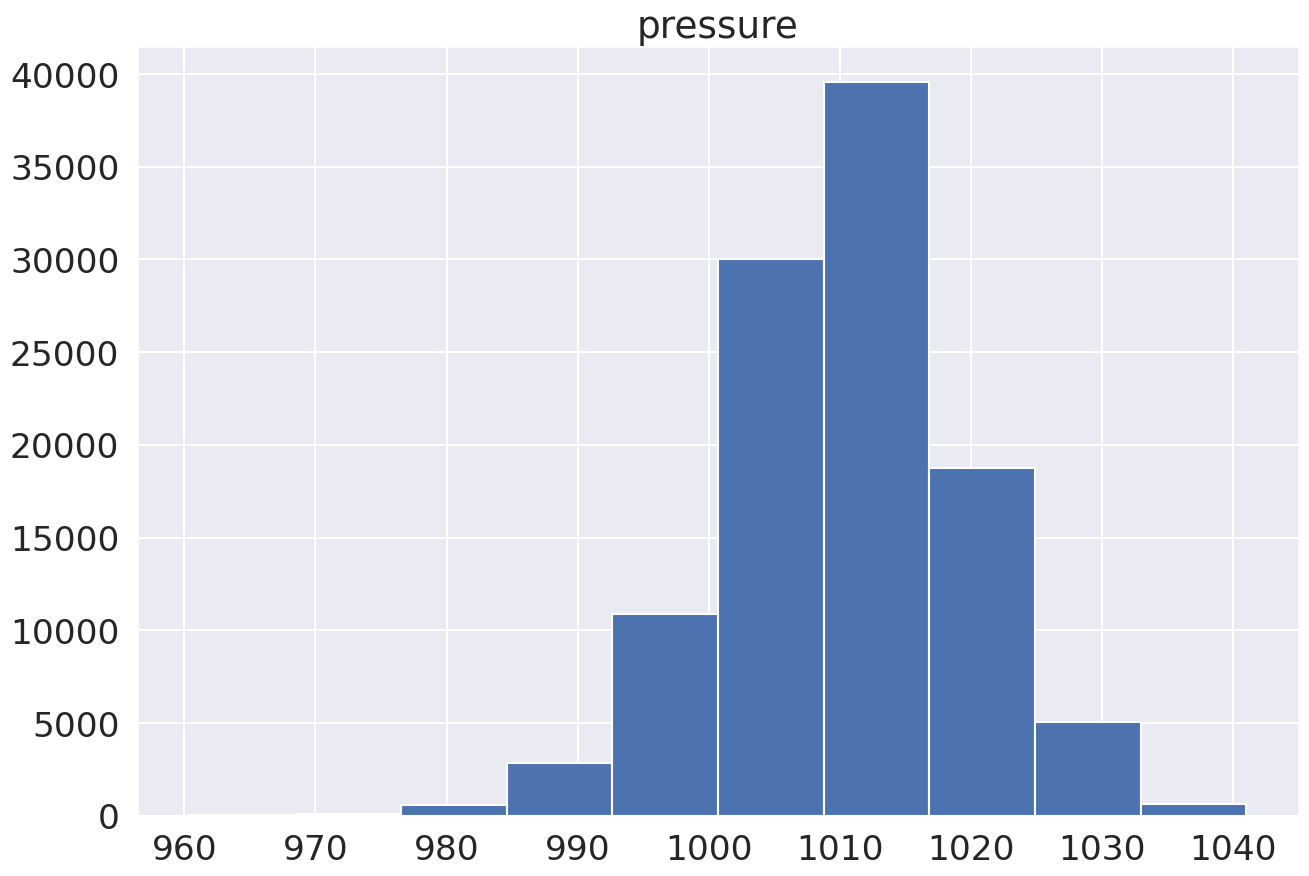

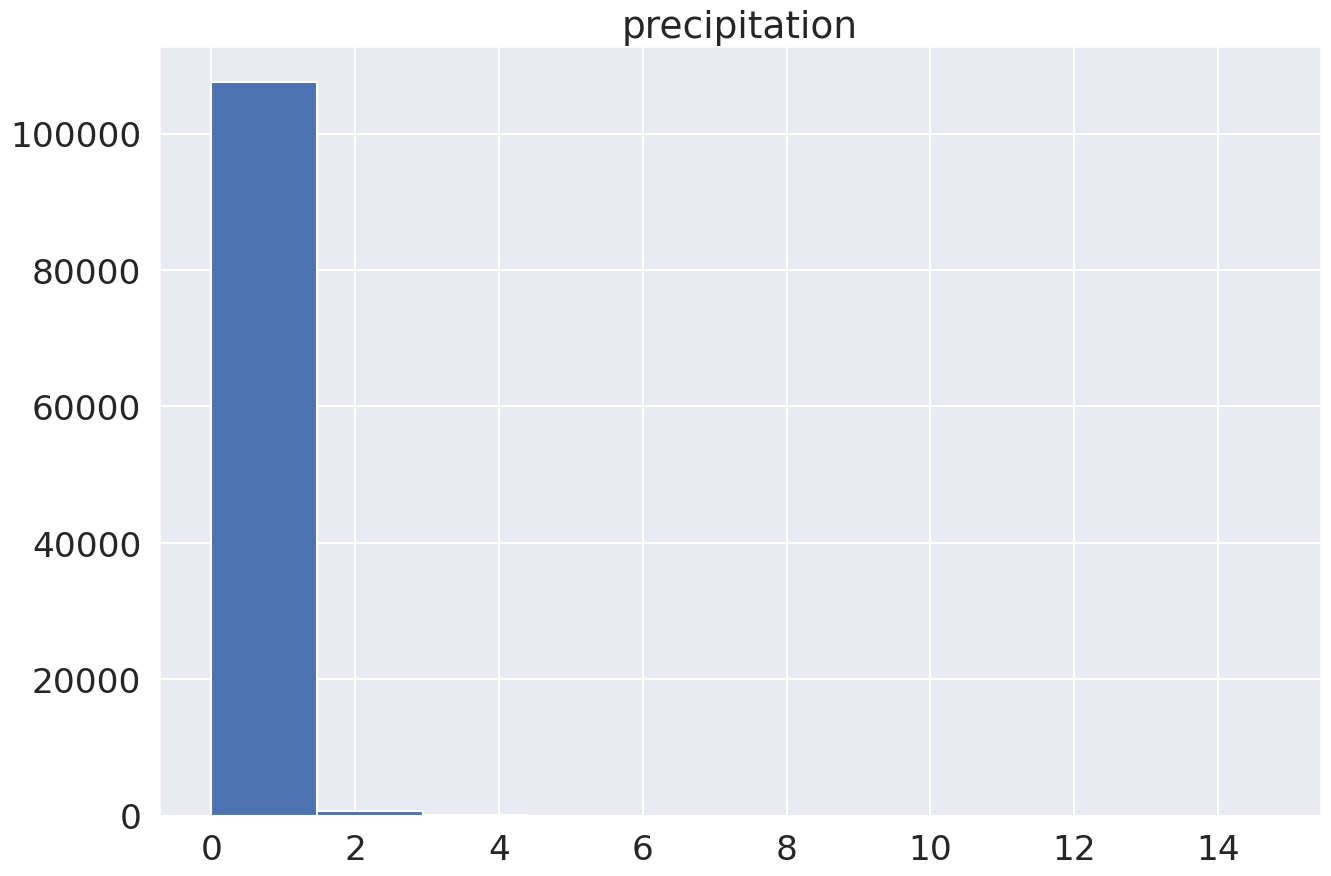

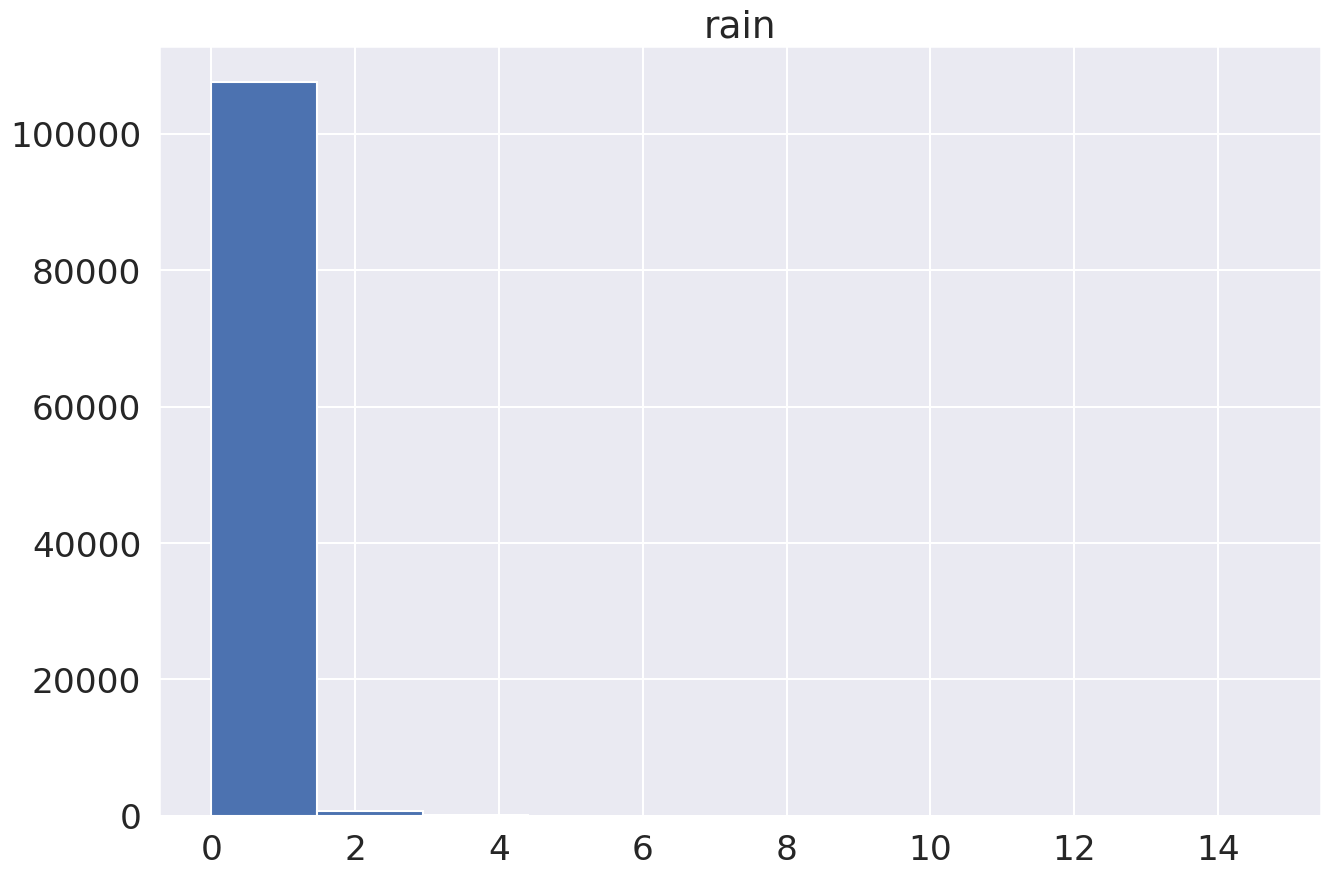

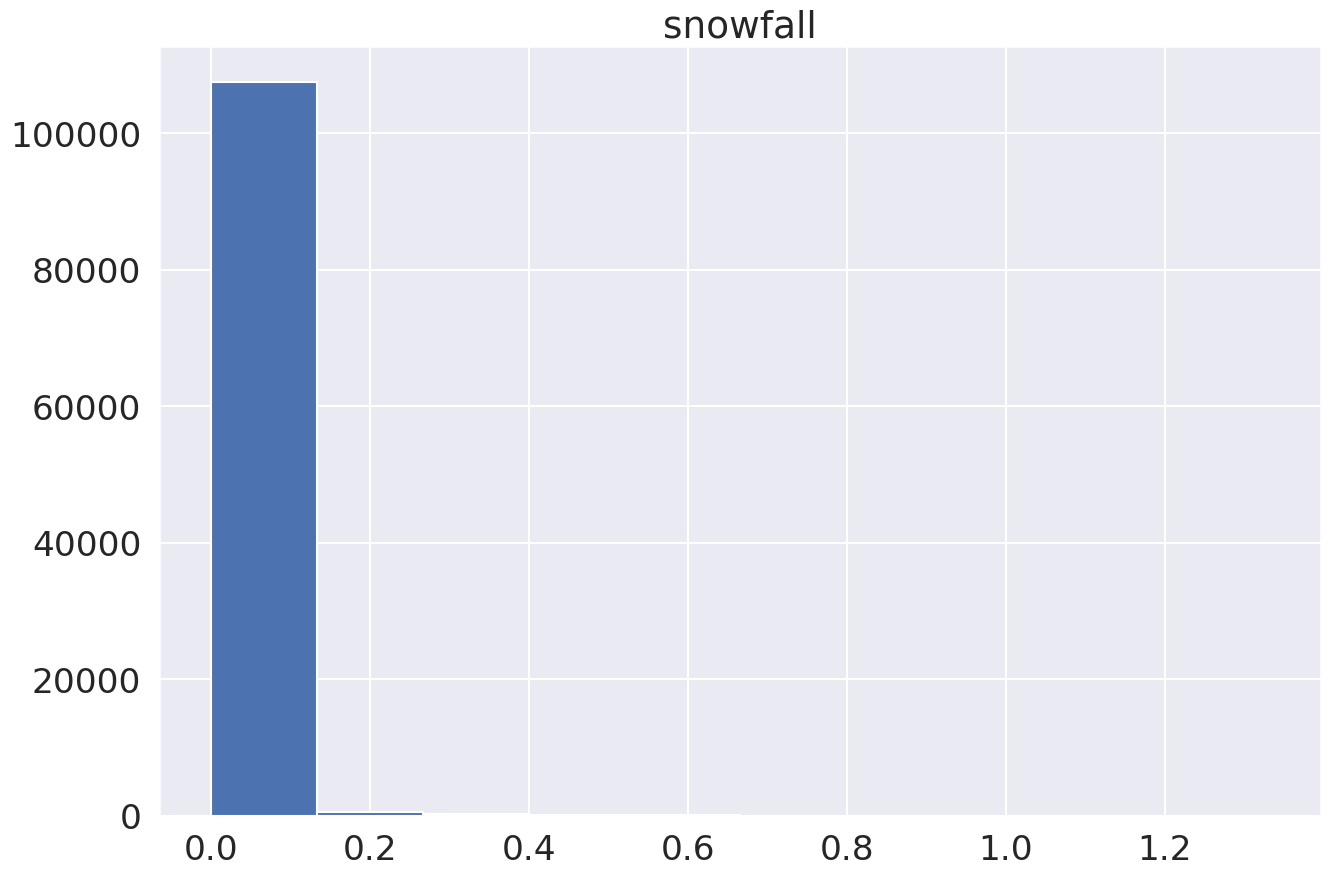

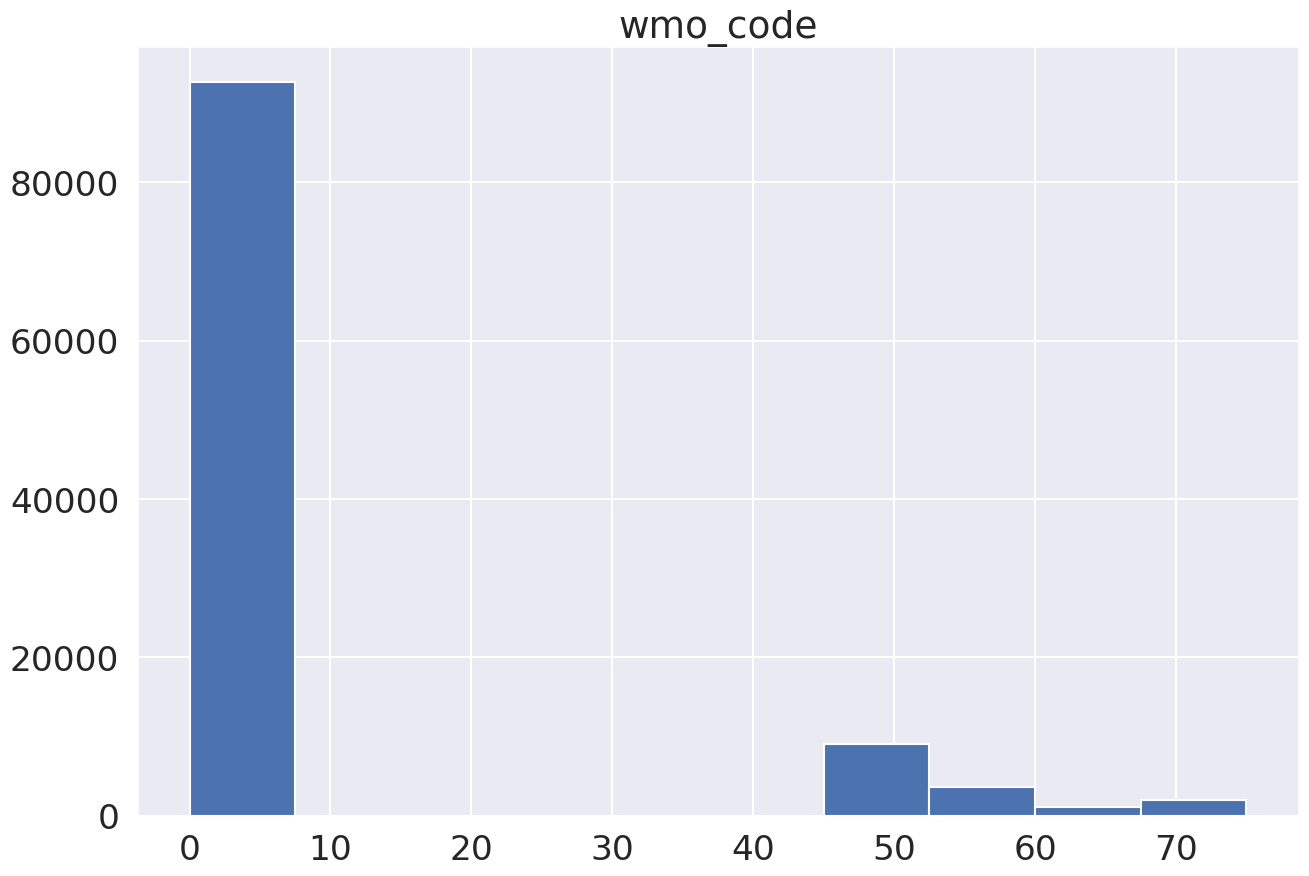

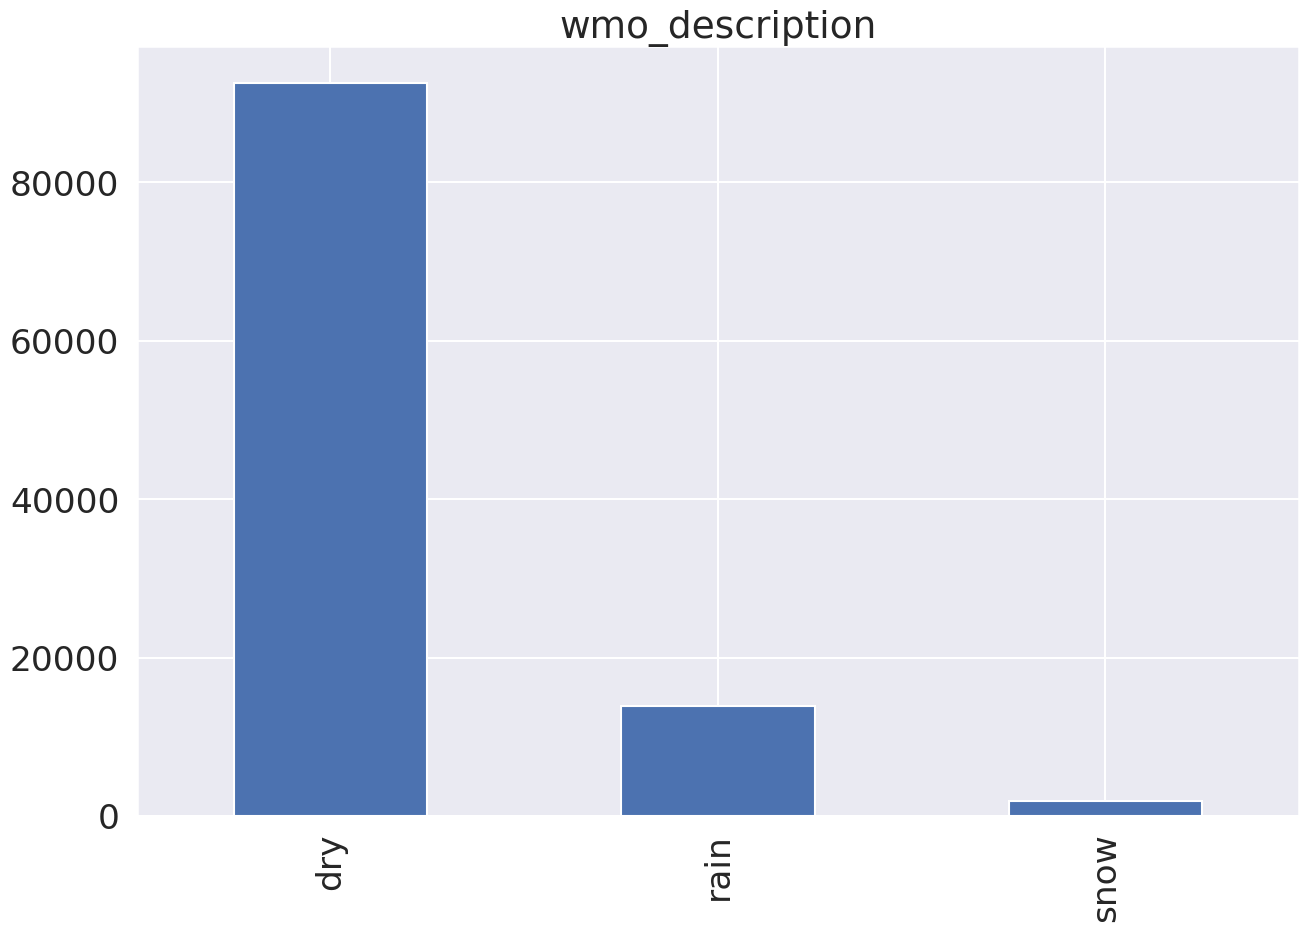

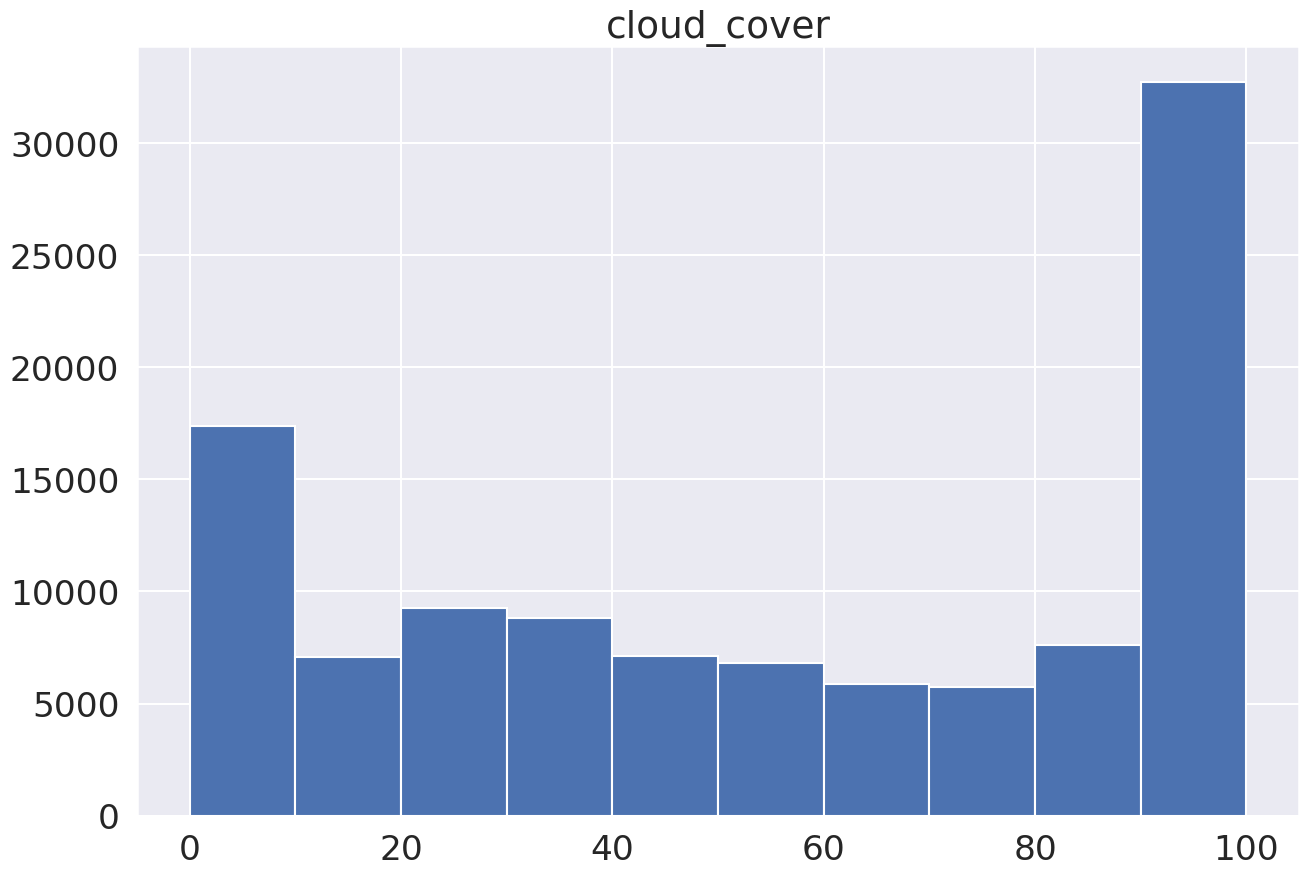

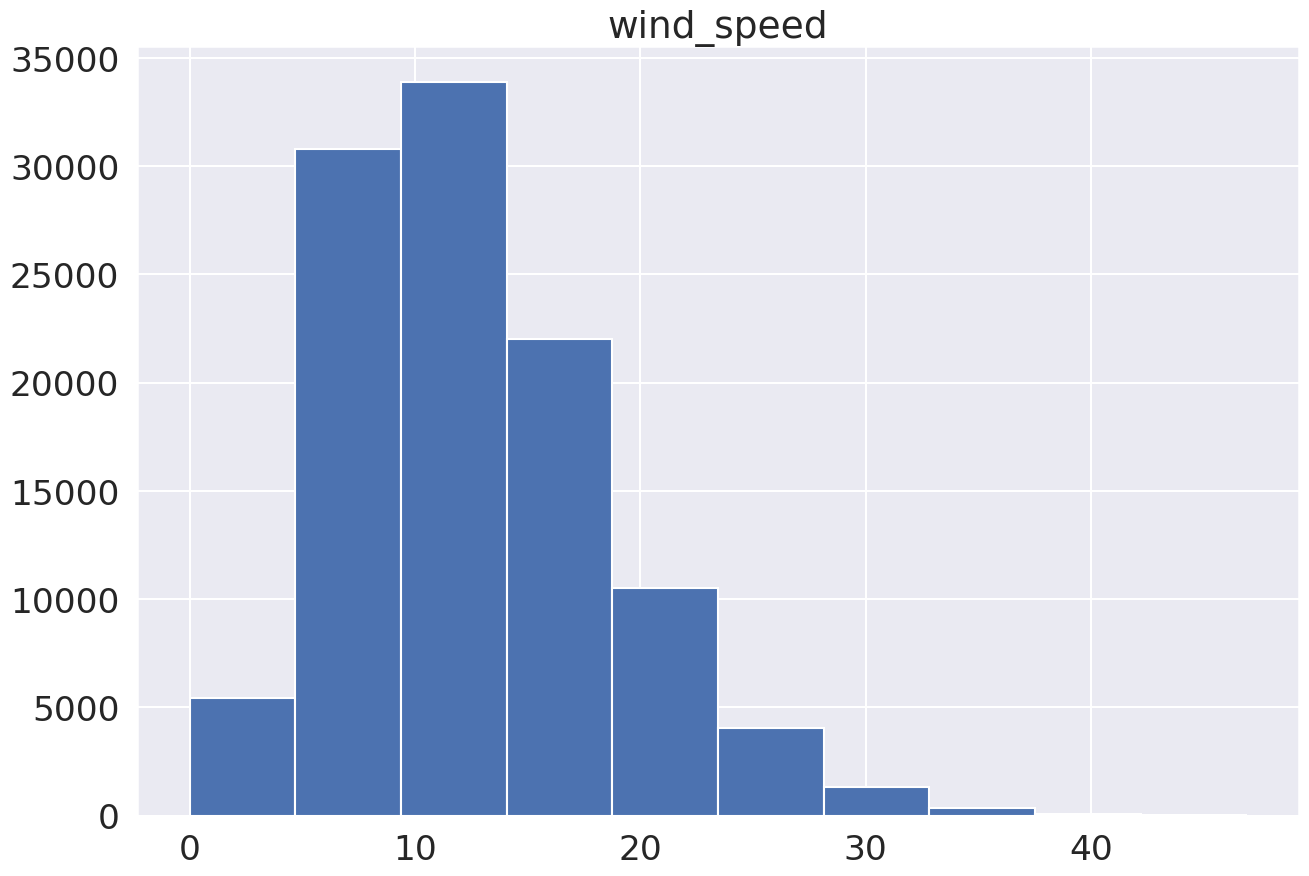

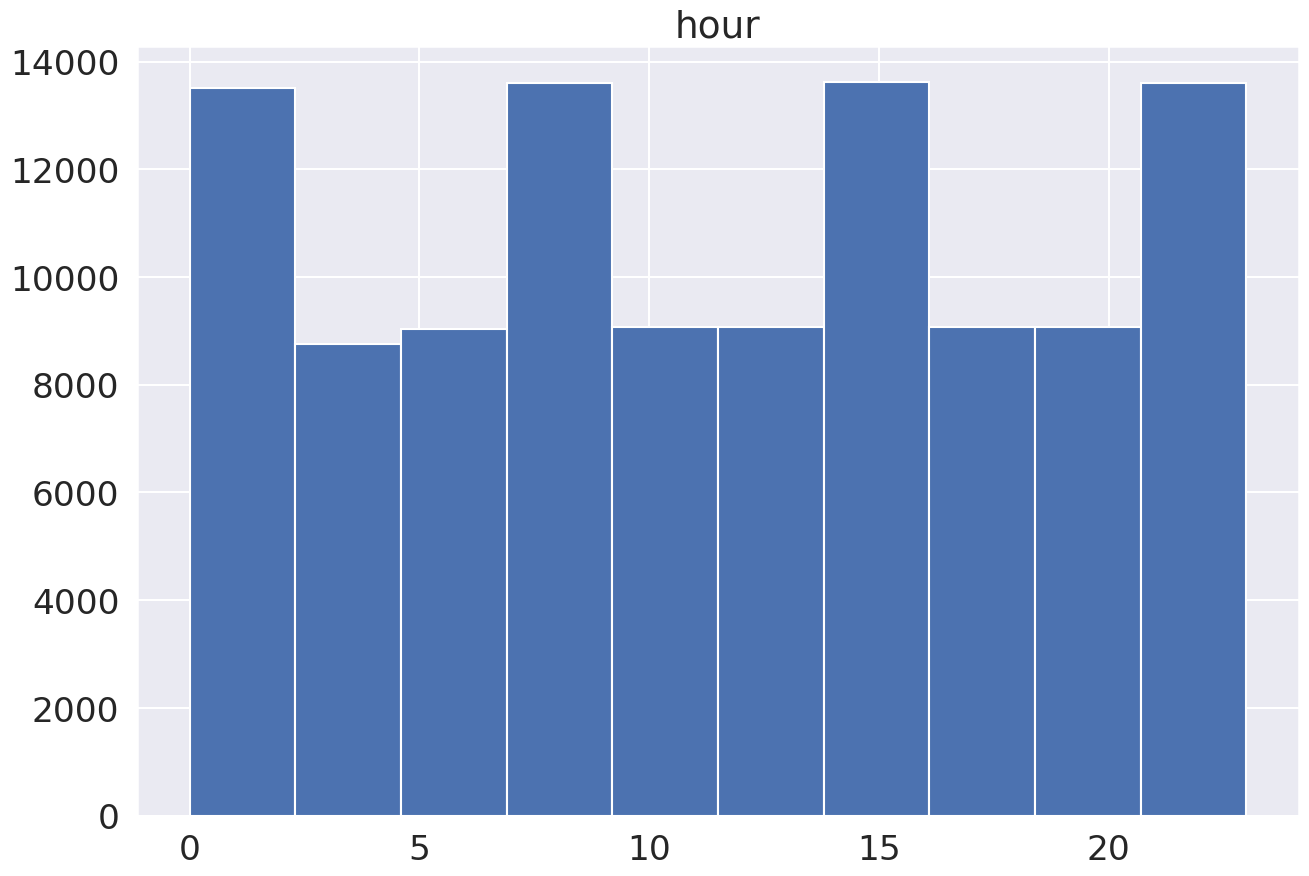

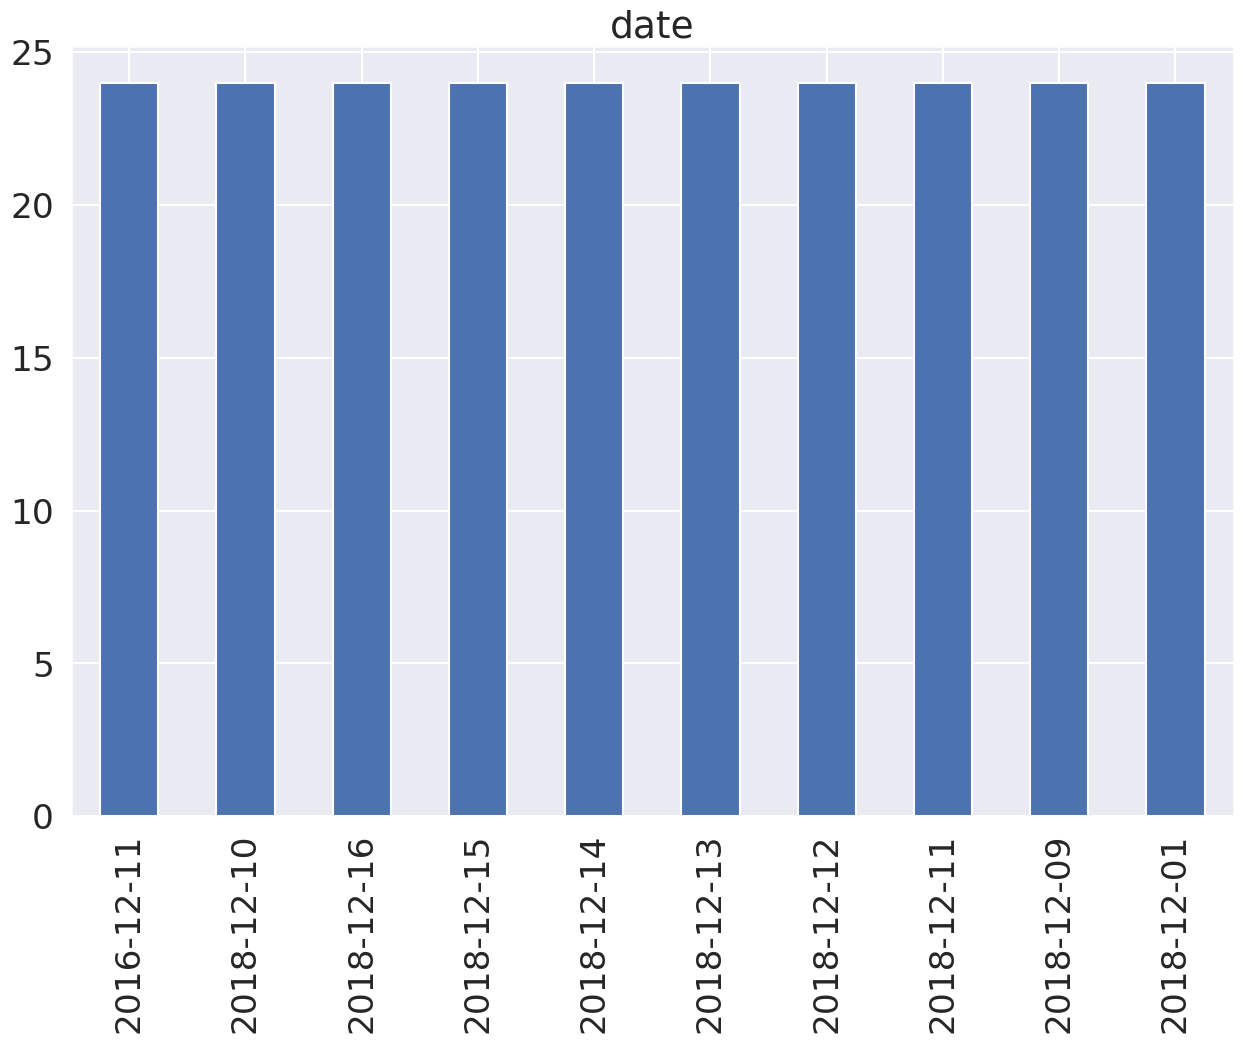

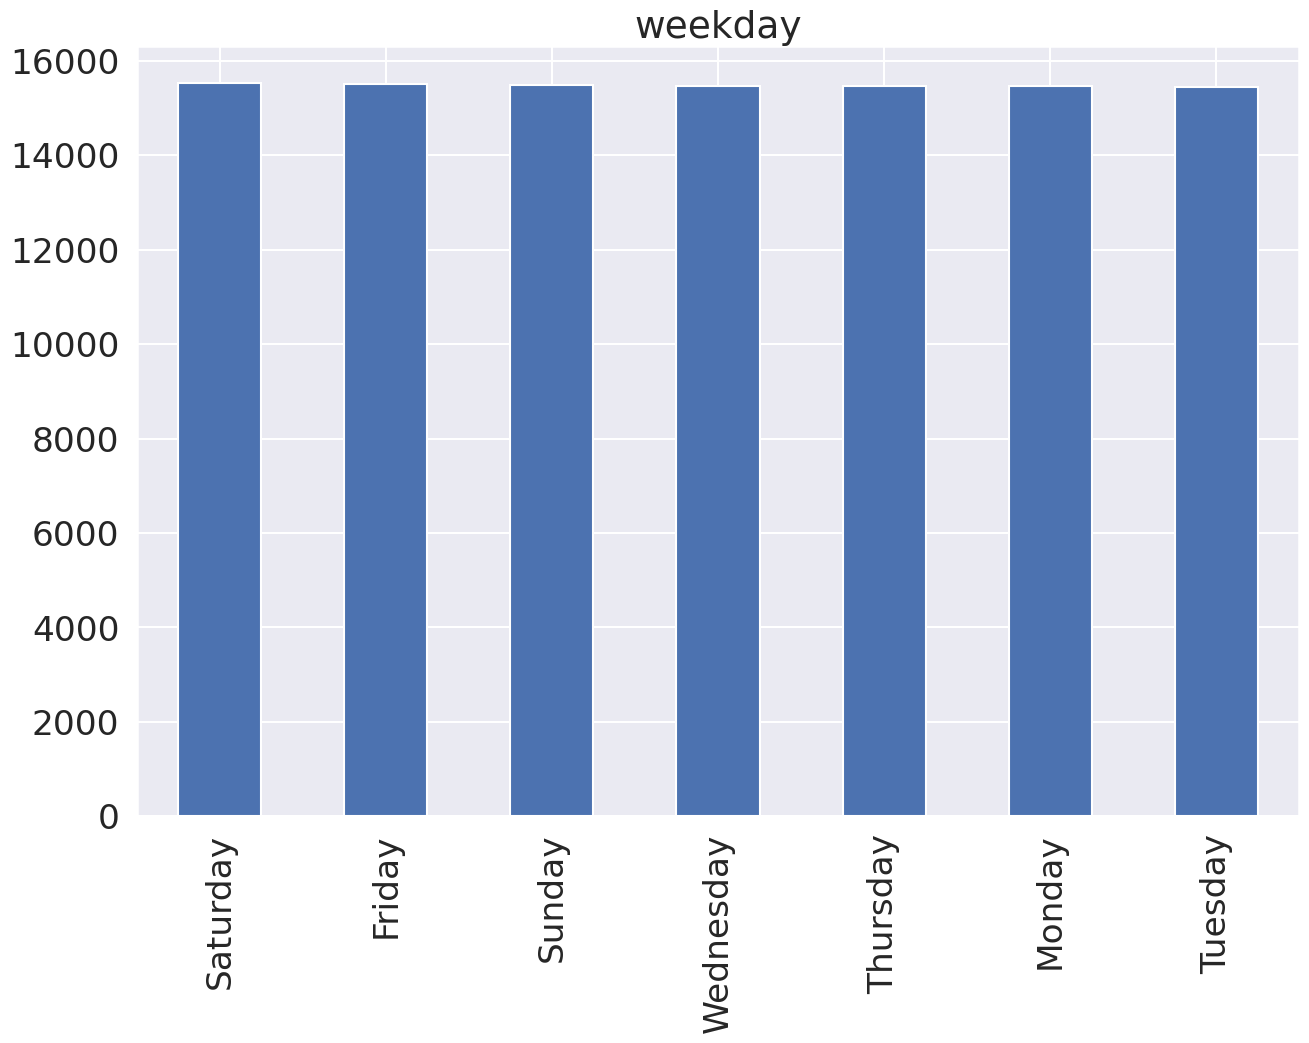

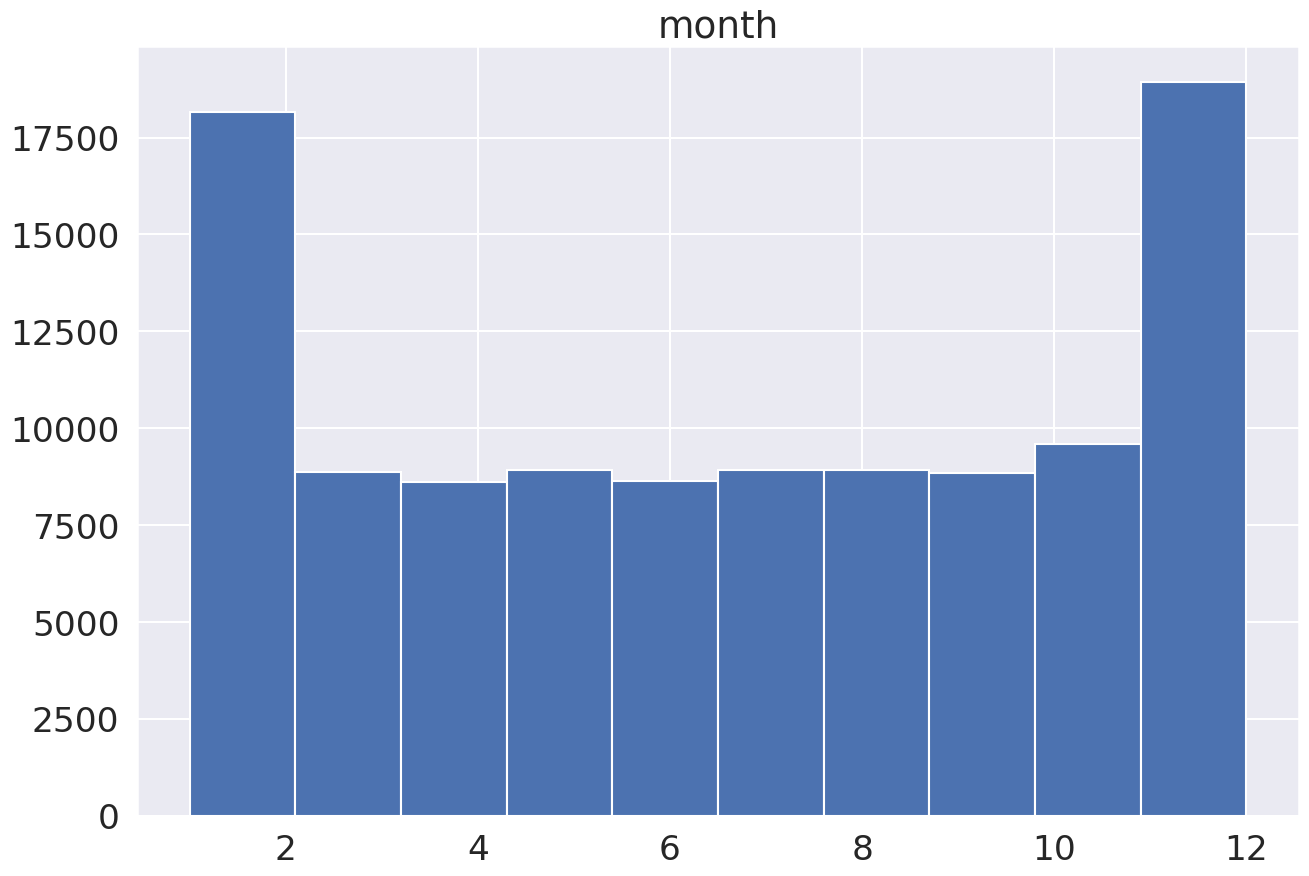

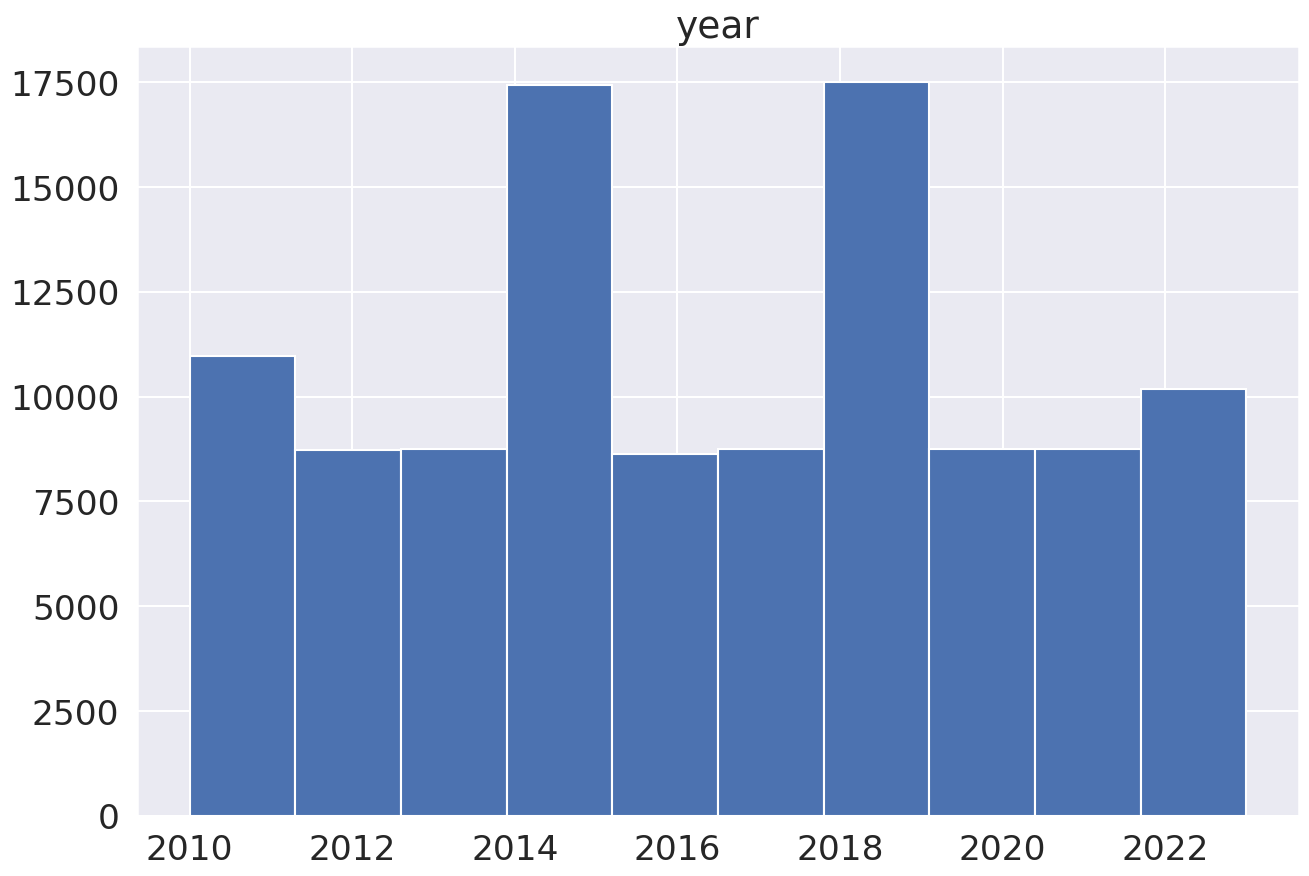

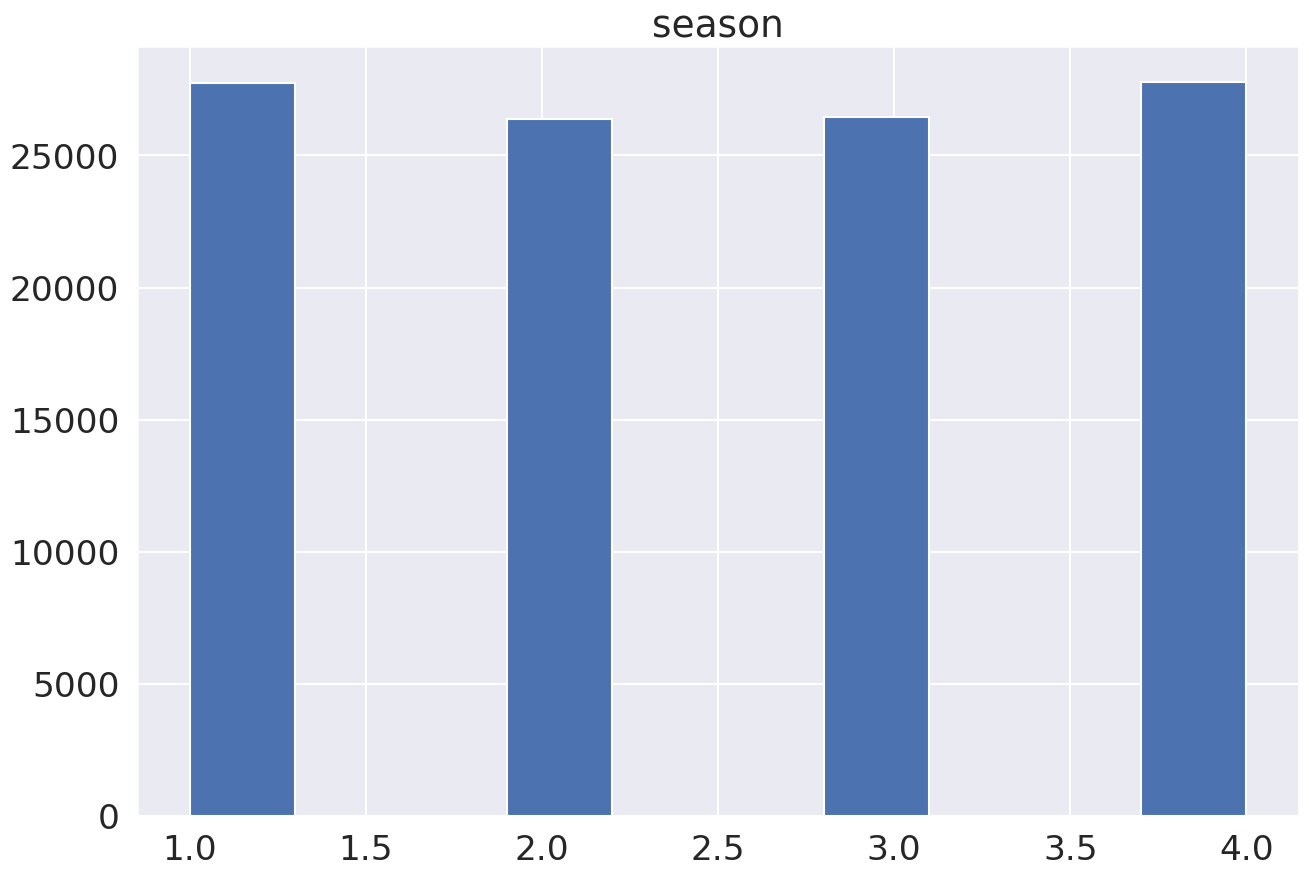

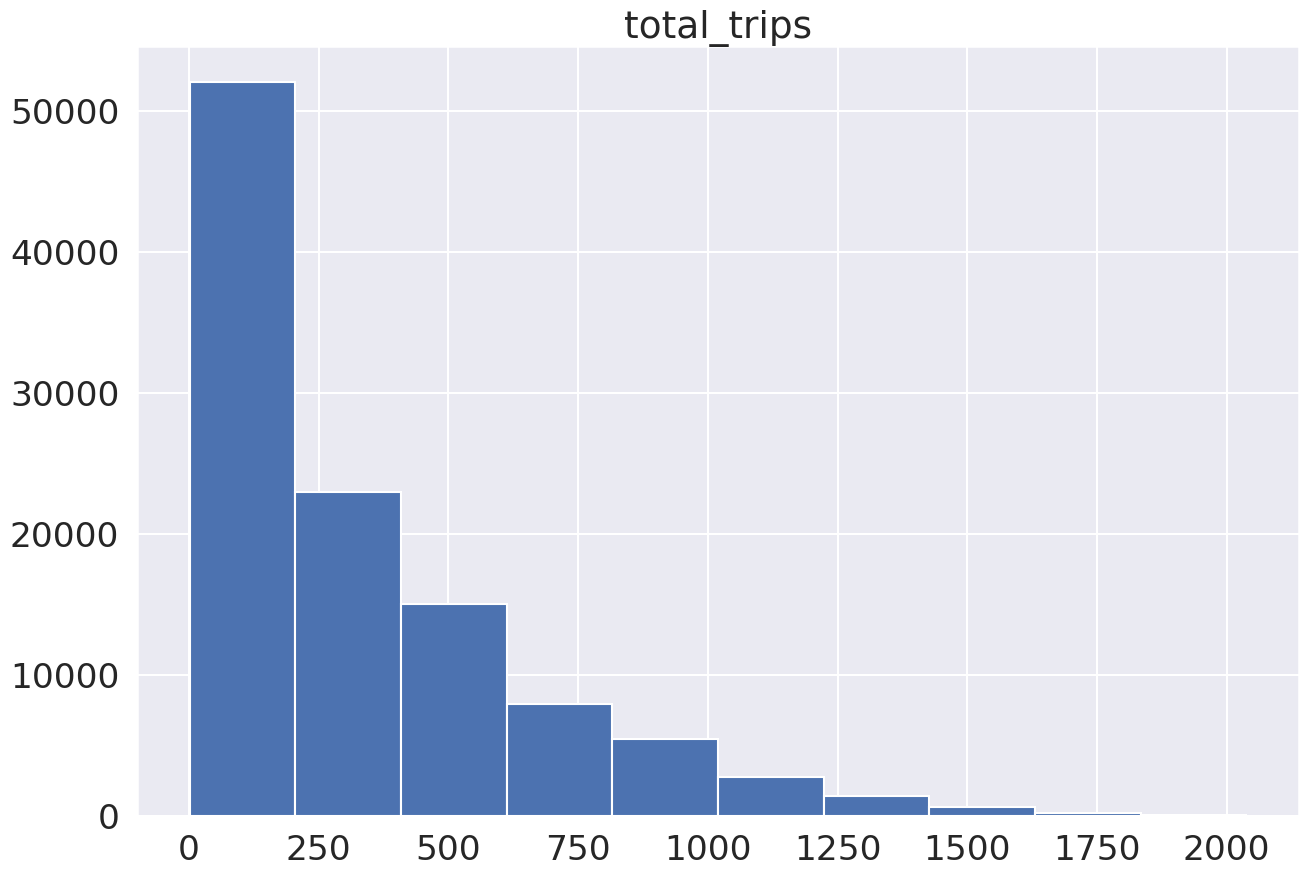

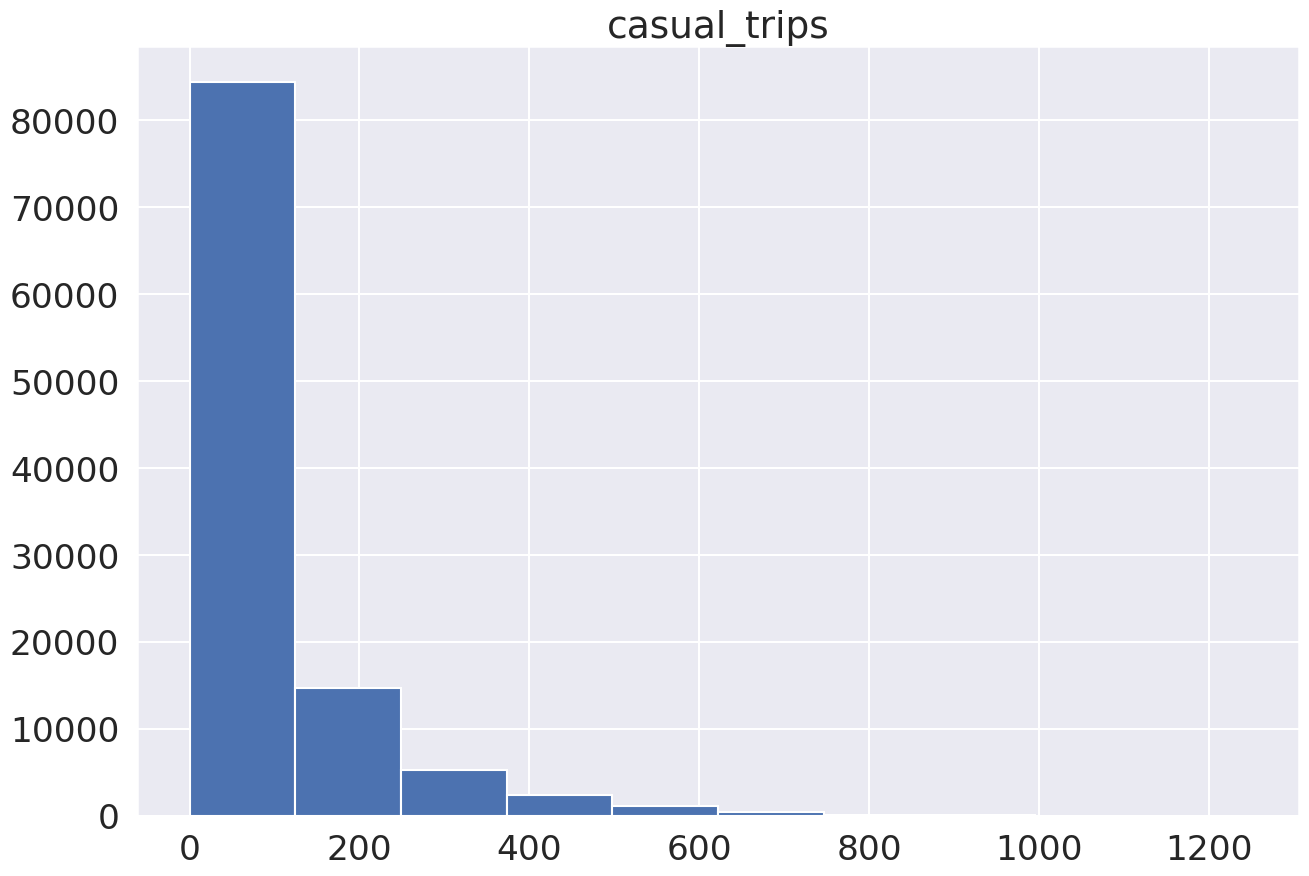

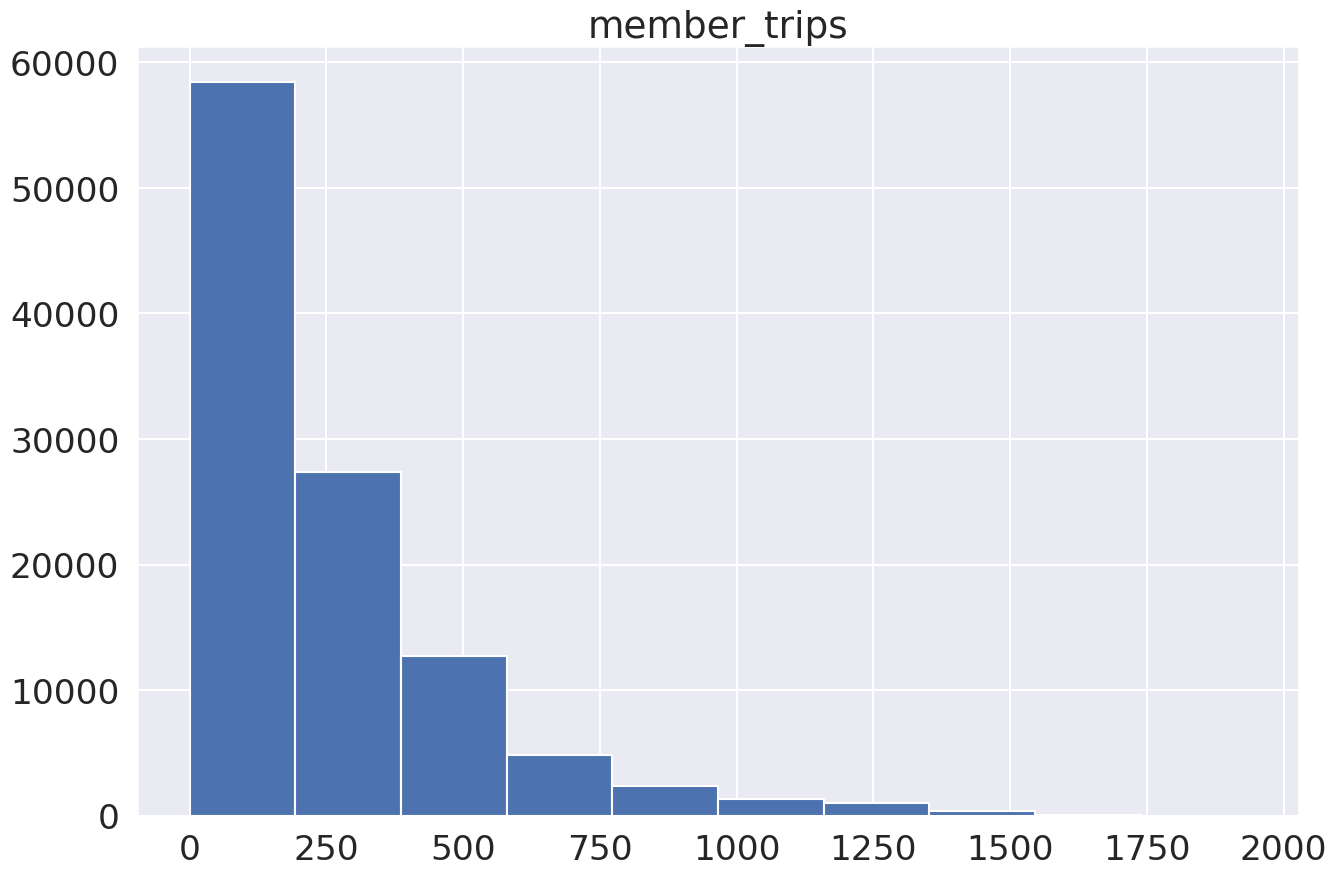

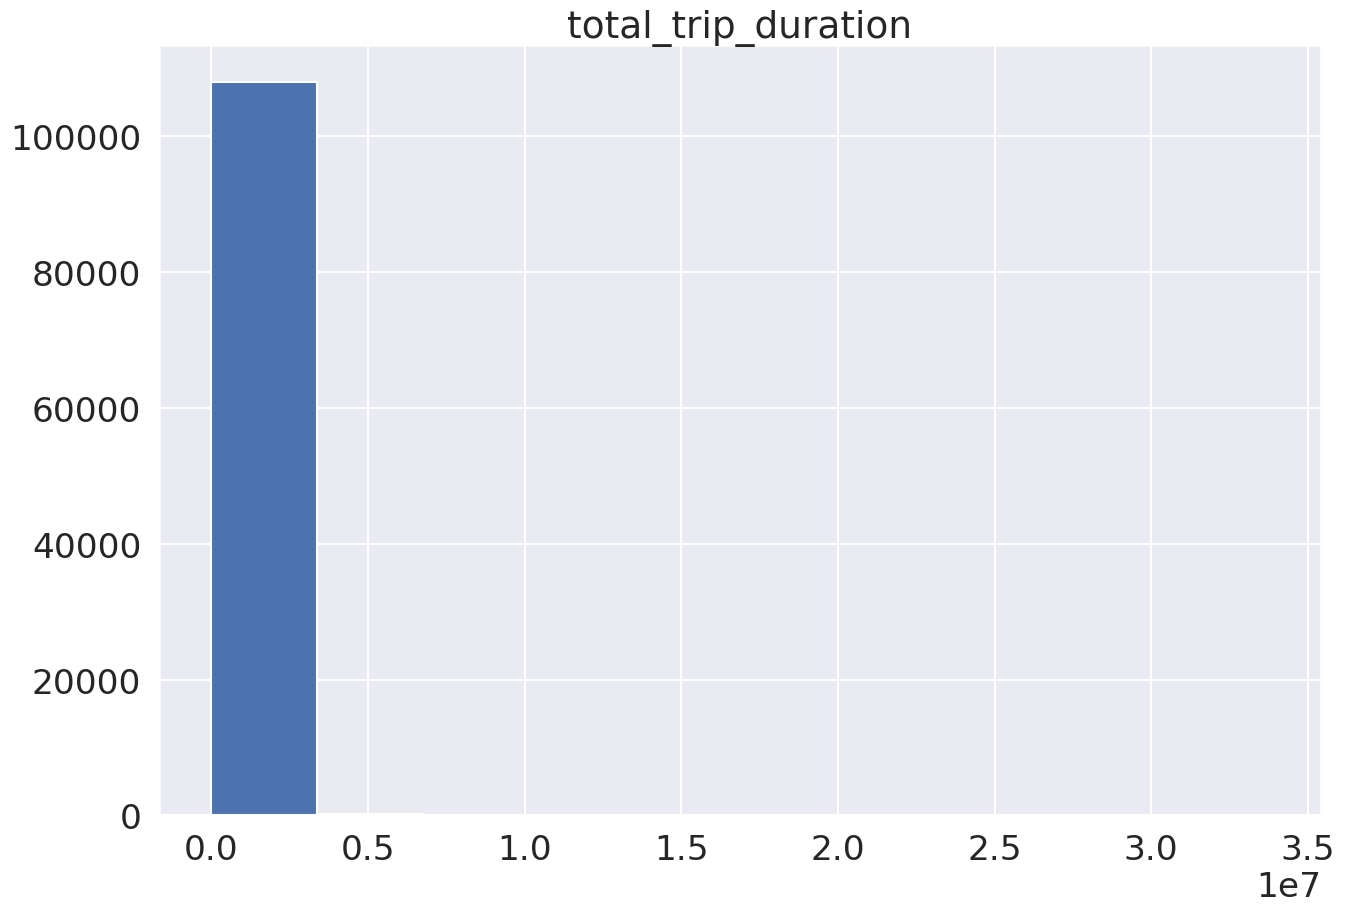

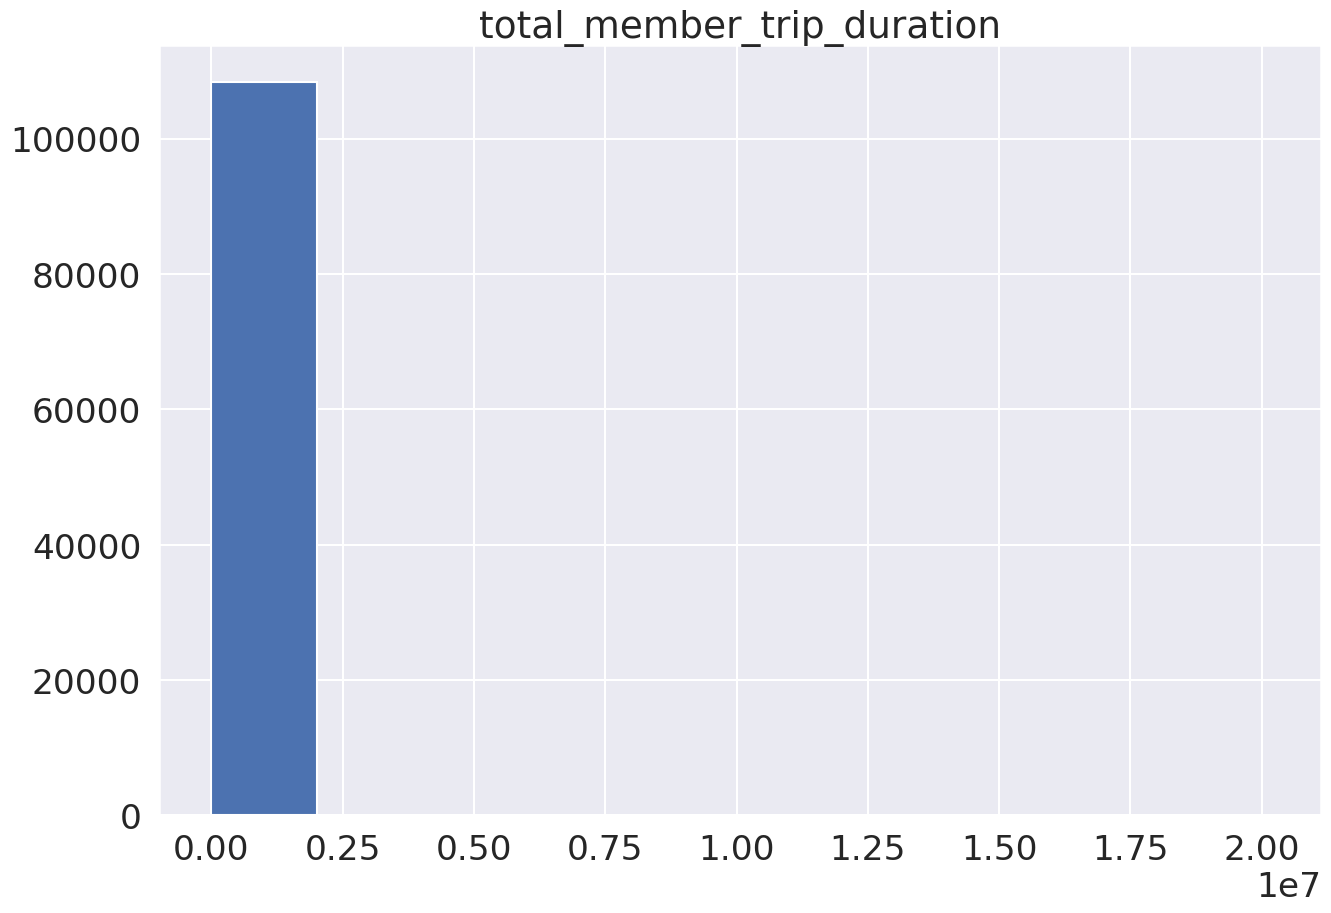

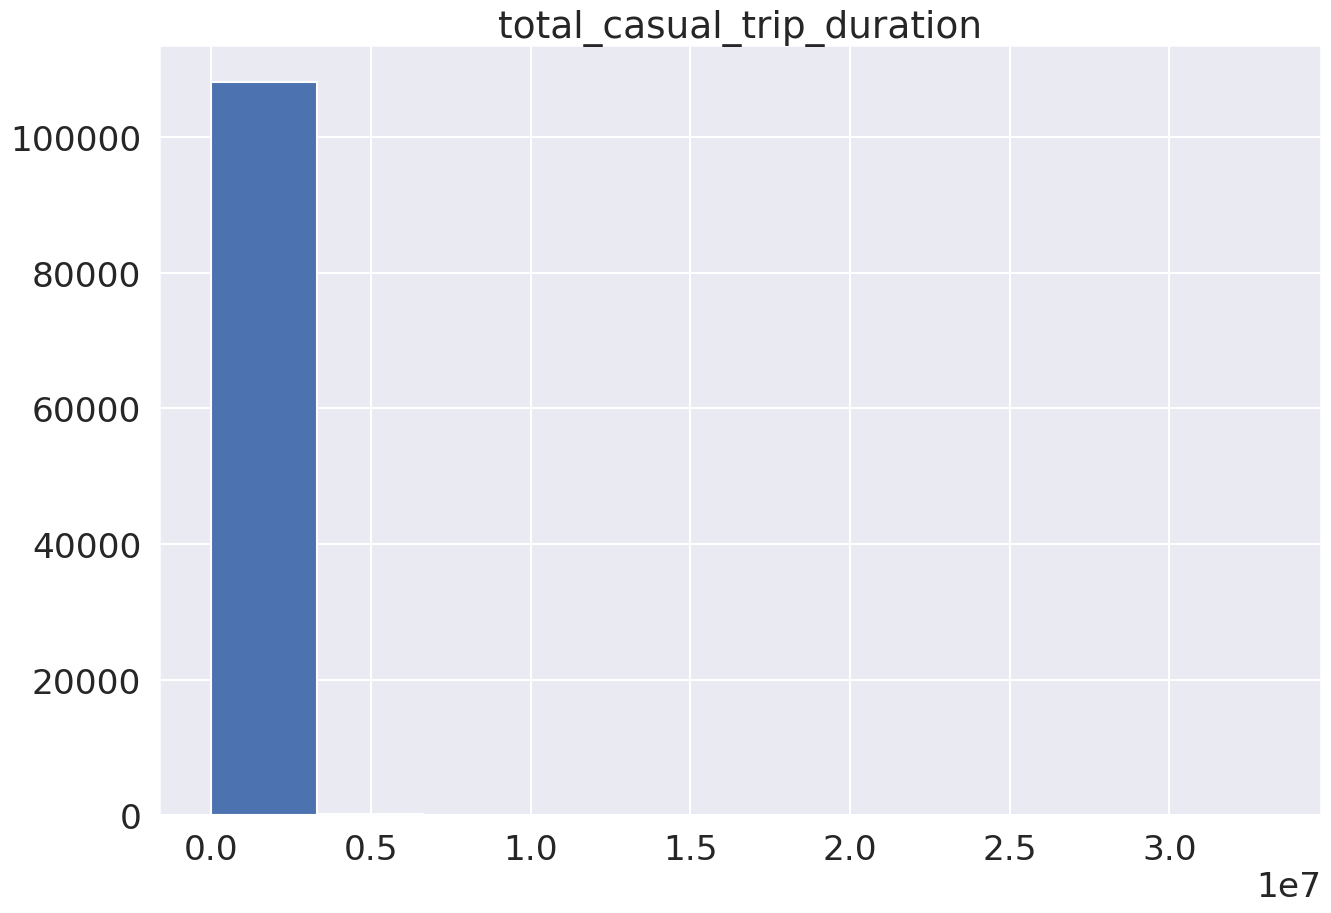

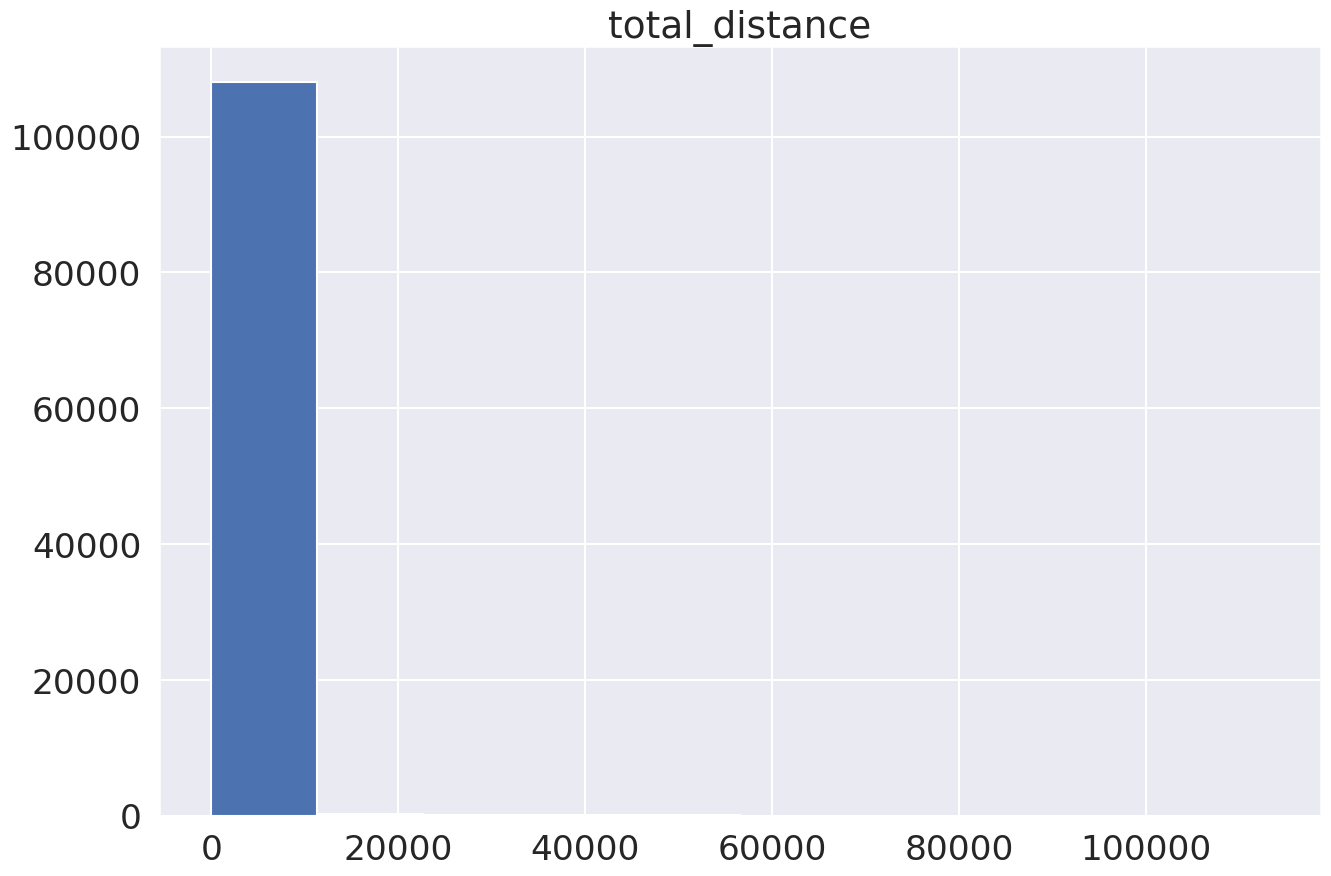

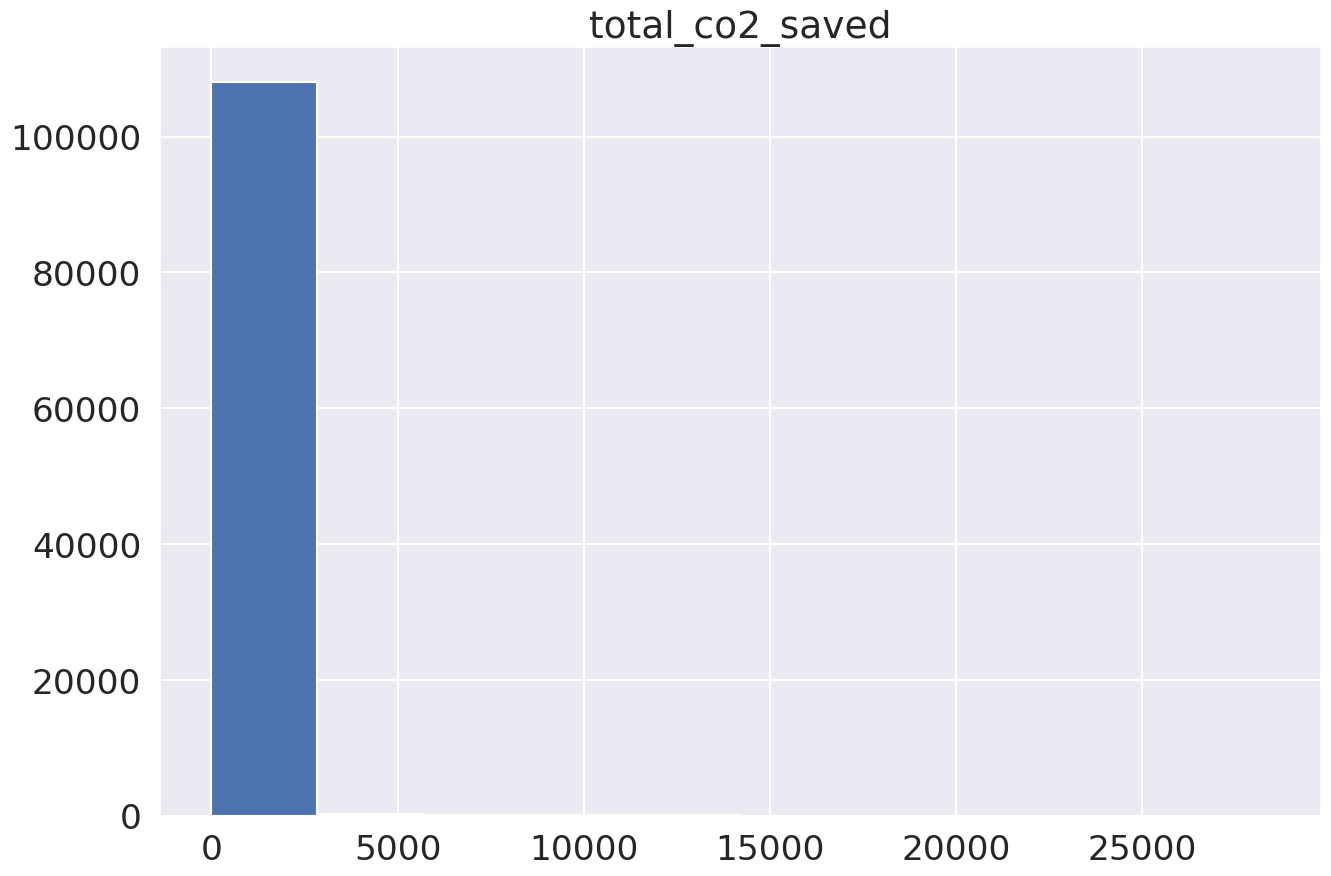

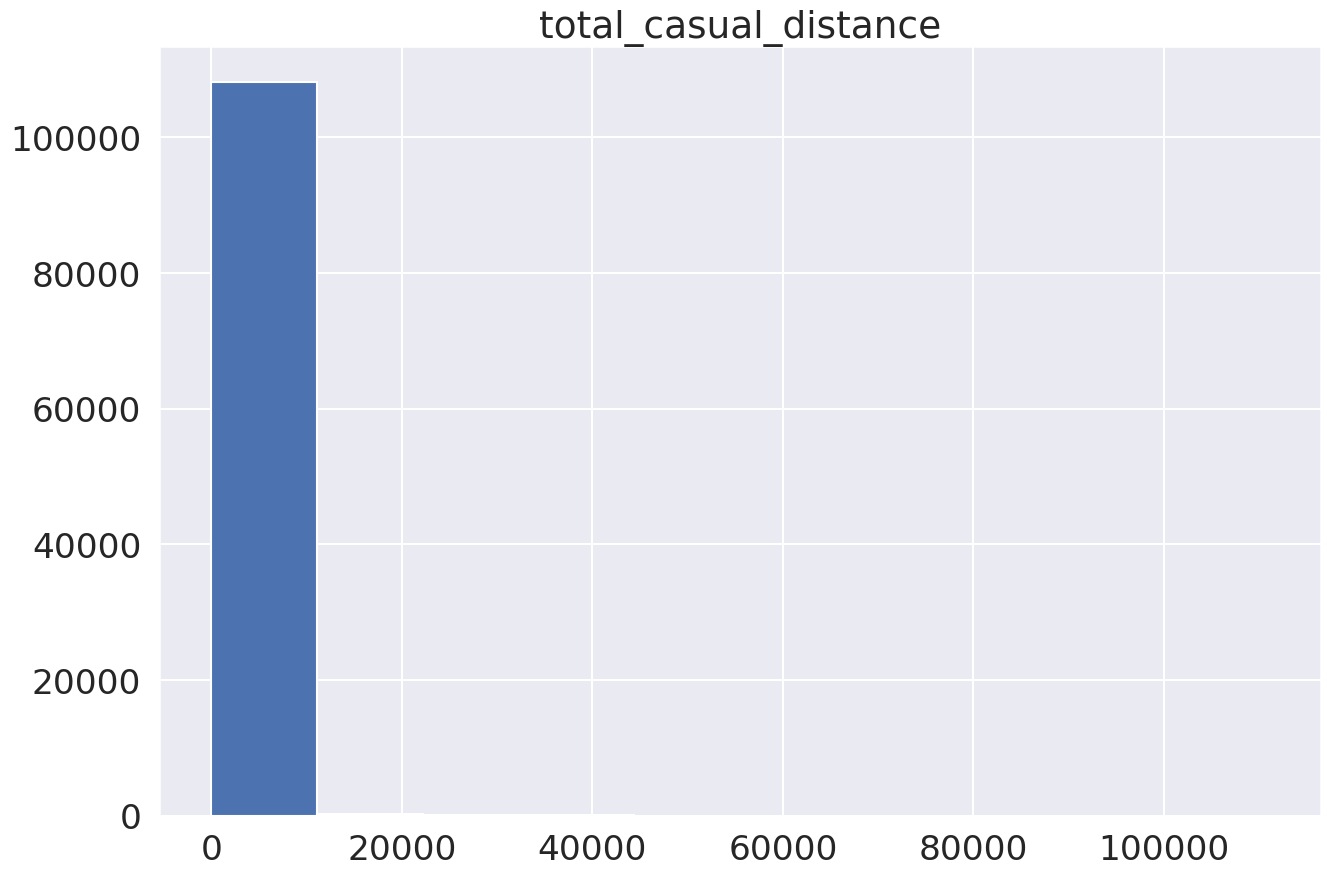

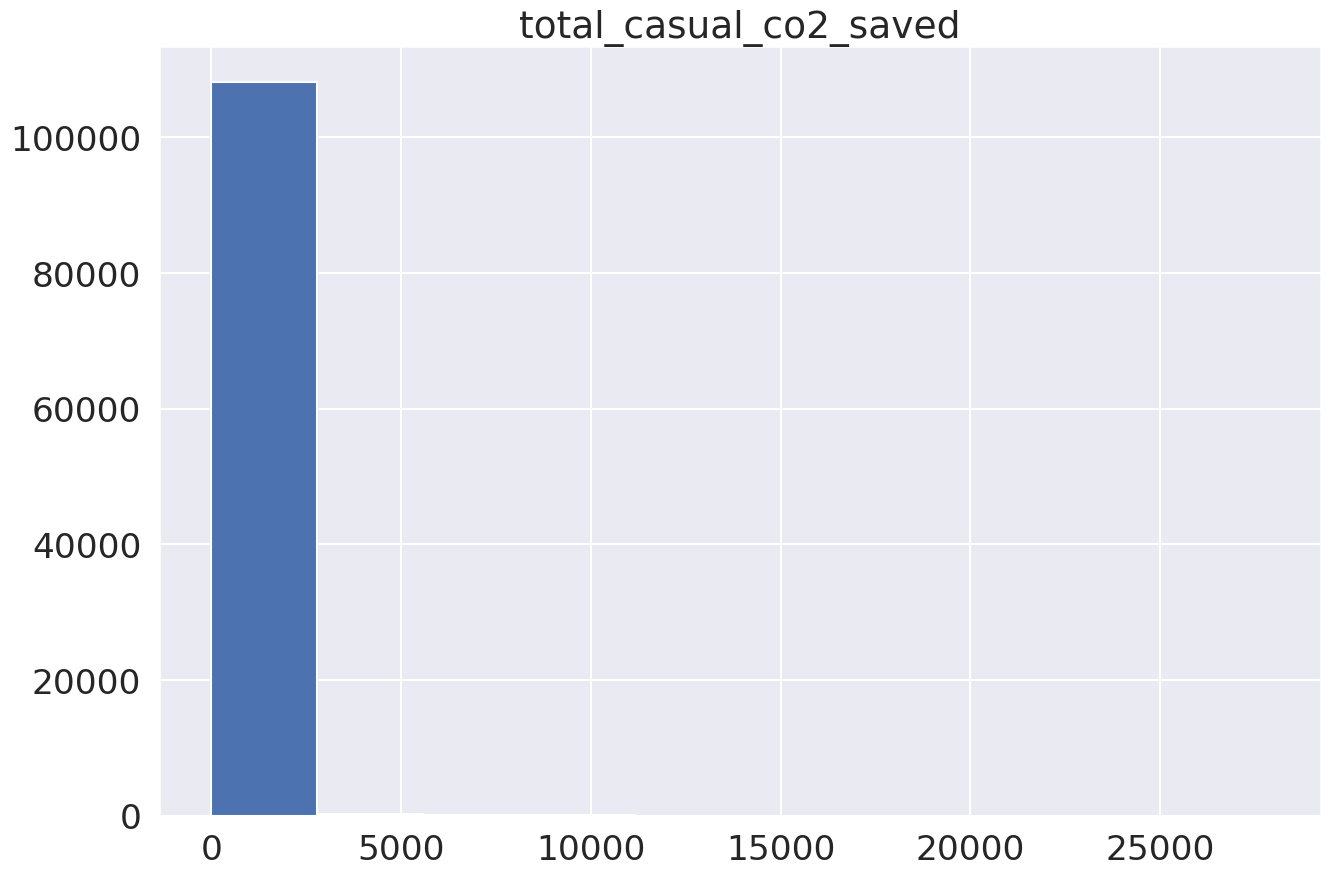

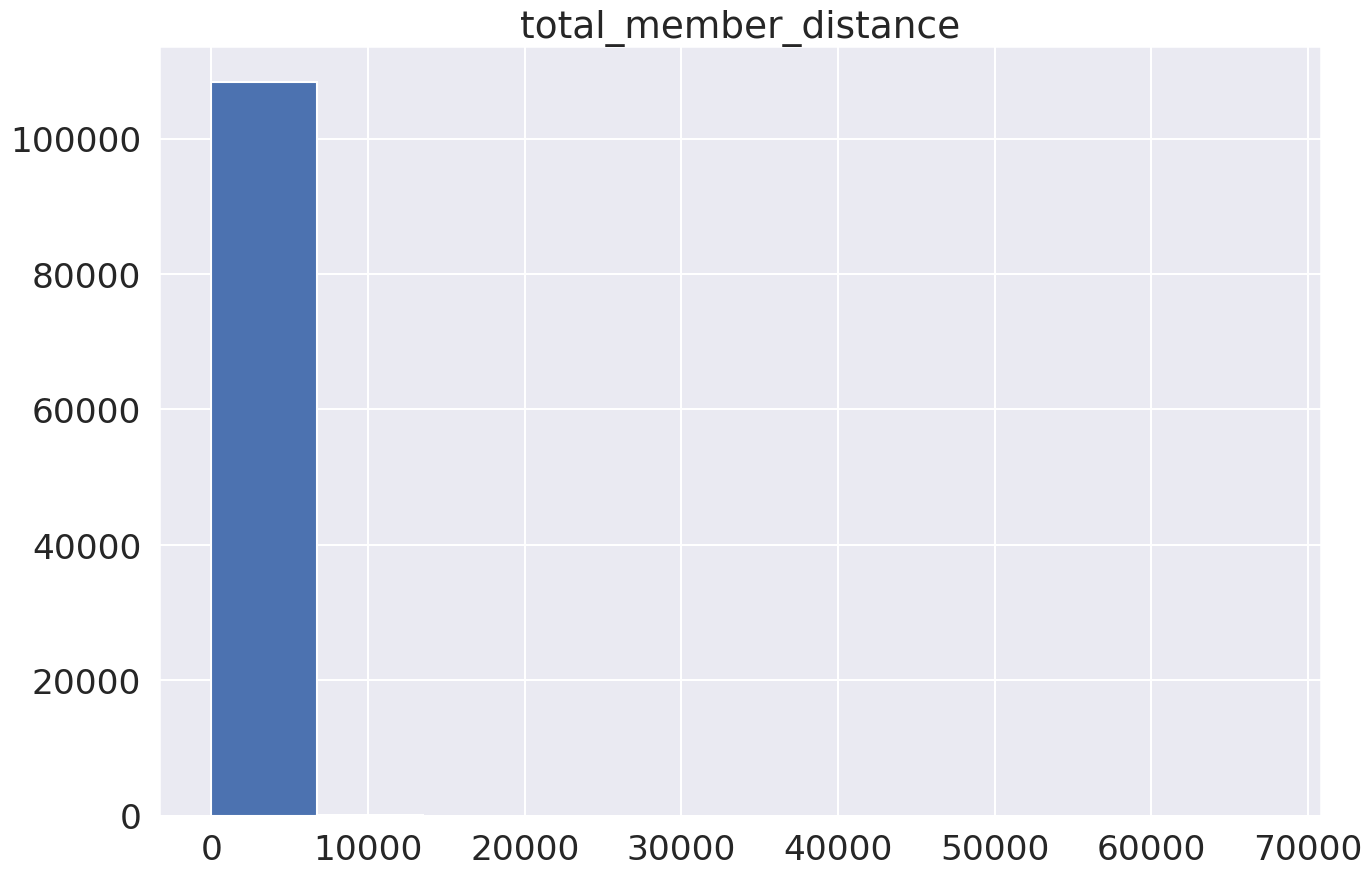

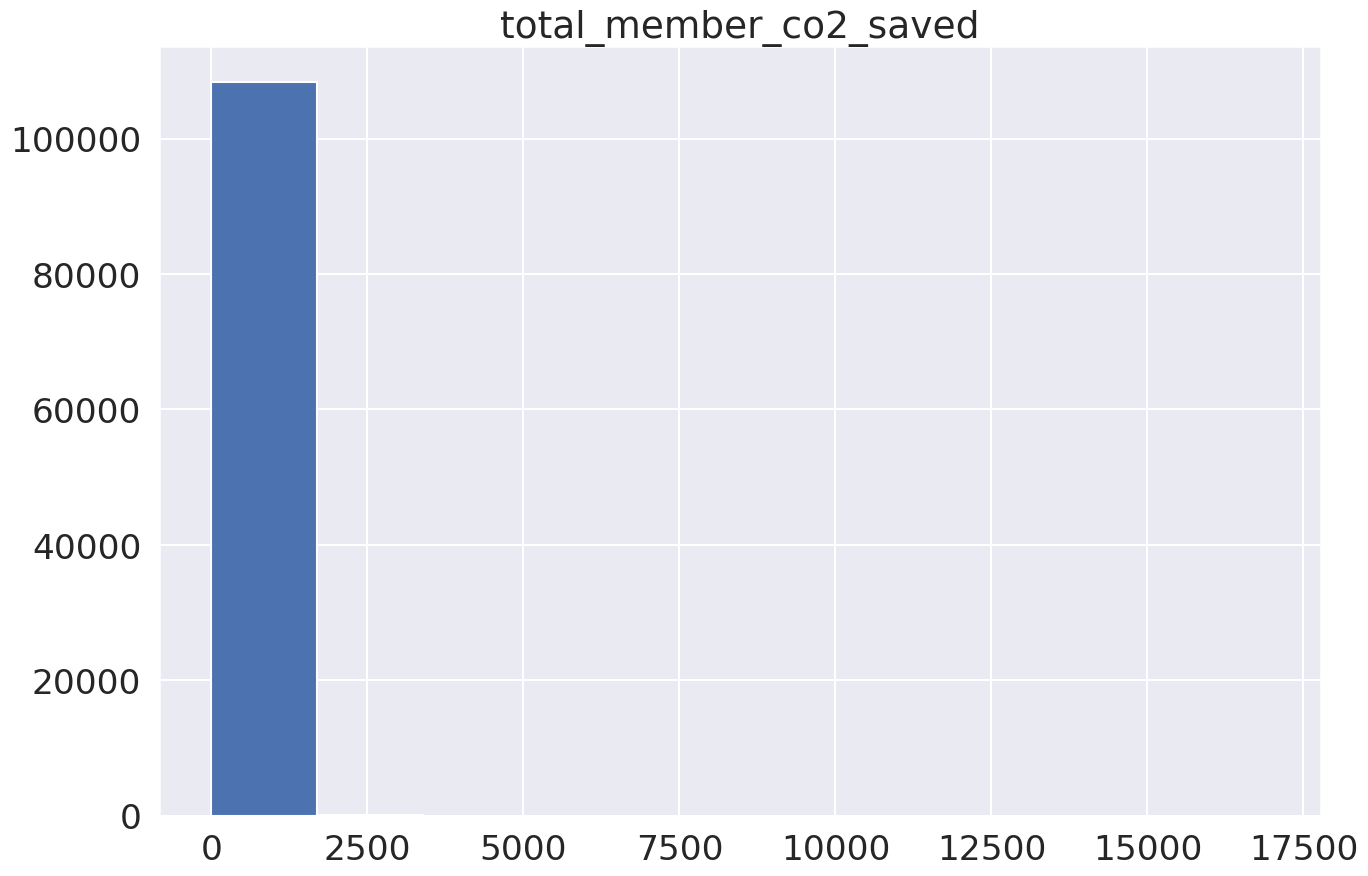

In [33]:
from pandas.core.dtypes.common import is_numeric_dtype, is_string_dtype

sns.set(rc={'figure.figsize':(15,10)})
sns.set_context('talk', font_scale=1.5)

for column in bg:
    plt.figure(column)
    plt.title(column)
    if is_numeric_dtype(bg[column]) and column != 'is_member':
        bg[column].hist()
    elif is_string_dtype(bg[column]):
        bg[column].value_counts()[:10].plot(kind='bar')

# multivariate analysis

/tmp/ipykernel_3129/4159359615.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correlation = correlation.mask(np.tril(np.ones(correlation.shape)).astype(np.bool))


<AxesSubplot: >

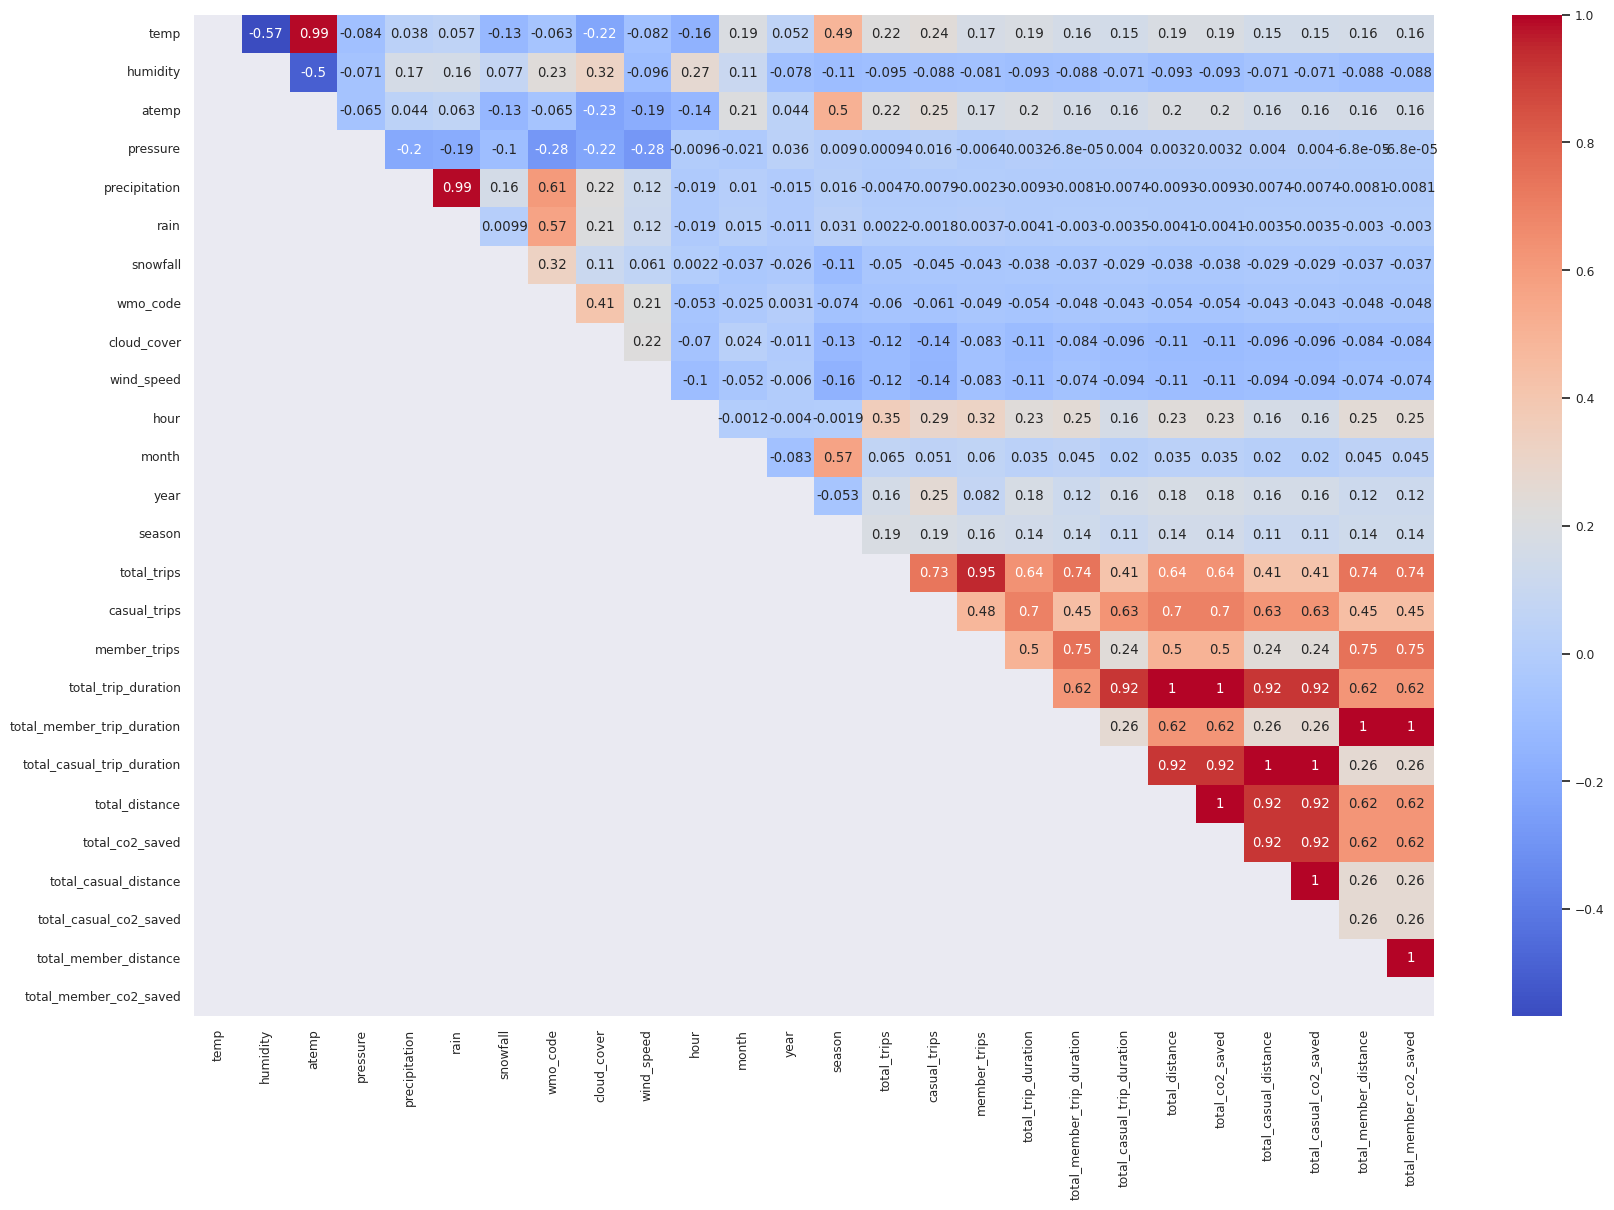

In [34]:
correlation = bg.corr(numeric_only=True)

correlation = correlation.mask(np.tril(np.ones(correlation.shape)).astype(np.bool))

sns.set(rc={'figure.figsize':(20,13)})
sns.set_context('notebook', font_scale=0.8)
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [35]:
# sns.pairplot(b_numerical, hue='is_member')

# Trips by hour of the day

In [36]:
b1 = bg.groupby(['hour'])['member_trips'].sum().reset_index()
b2 = bg.groupby(['hour'])['casual_trips'].sum().reset_index()

In [37]:
display(b1)
display(b2)

hour  member_trips
0      0        225991
1      1        131915
2      2         83256
3      3         41448
4      4         38786
5      5        180640
6      6        606295
7      7       1533563
8      8       2415168
9      9       1387829
10    10        983566
11    11       1122313
12    12       1343419
13    13       1318146
14    14       1251037
15    15       1422007
16    16       1879142
17    17       2862678
18    18       2480251
19    19       1696342
20    20       1167691
21    21        853083
22    22        622254
23    23        397706

hour  casual_trips
0      0         97091
1      1         59176
2      2         38215
3      3         20655
4      4         13297
5      5         23865
6      6         59082
7      7        130780
8      8        245124
9      9        330681
10    10        469220
11    11        593104
12    12        677048
13    13        721999
14    14        761089
15    15        780770
16    16        777349
17    17        805200
18    18        676049
19    19        527077
20    20        384256
21    21        291199
22    22        229904
23    23        156170

Text(0.5, 1.0, 'Hourly rental trend')

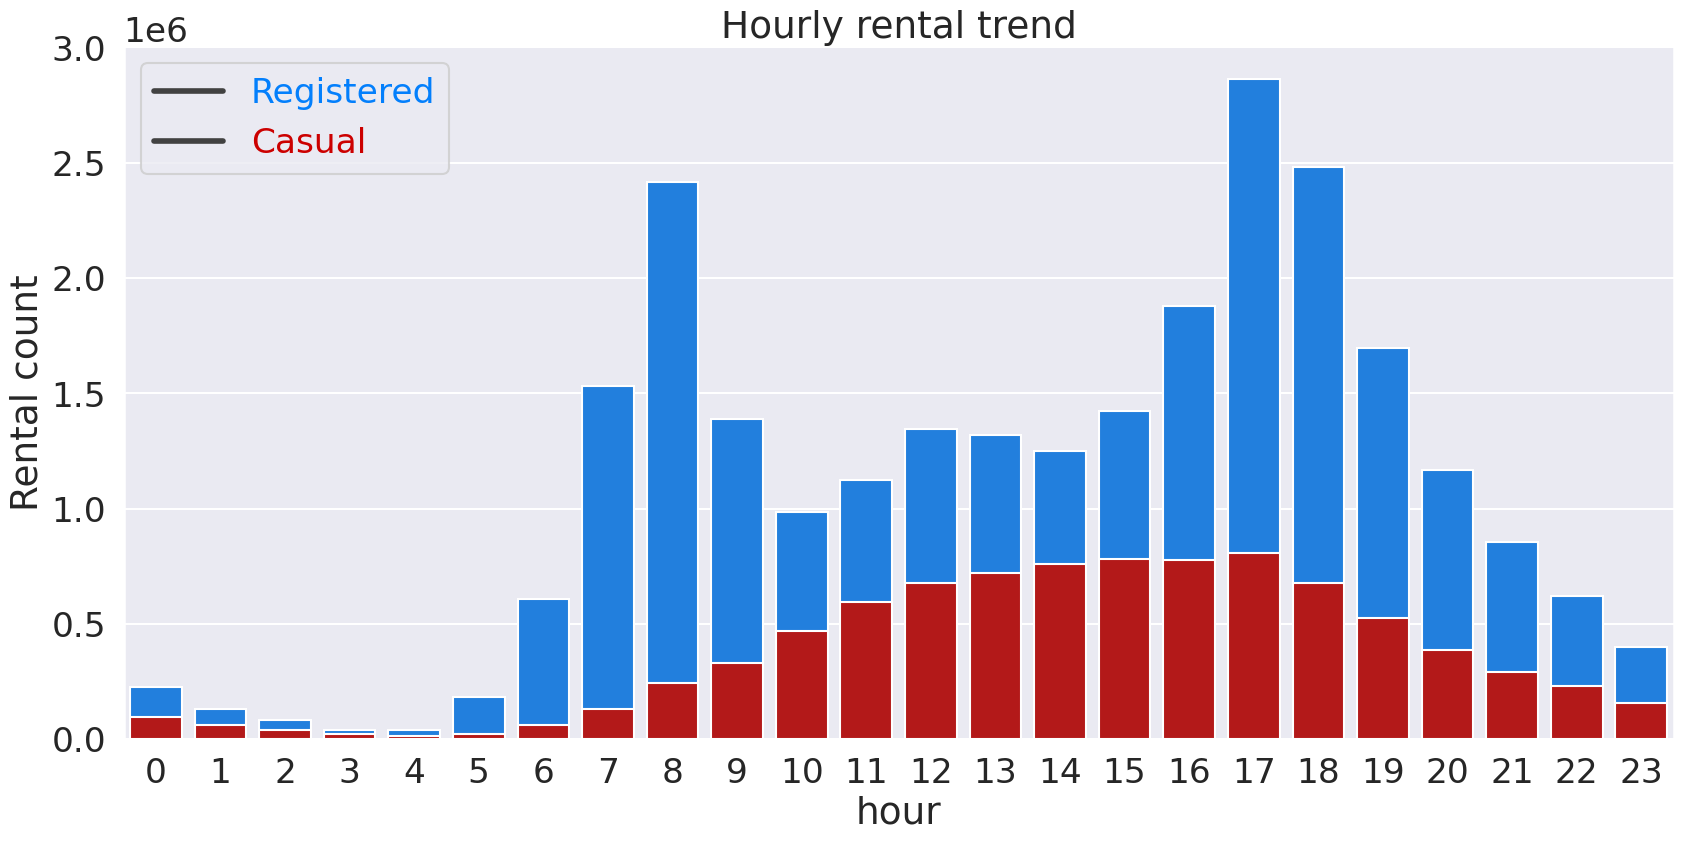

In [38]:
# plot hourly trend with seaborn
# increase seaborn plot size
sns.set(rc={'figure.figsize':(20,9)})
sns.set_context('talk', font_scale=1.5)

bar1 = sns.barplot(x="hour", y="member_trips", data=b1, color=color_reg)
bar2 = sns.barplot(x="hour", y="casual_trips", data=b2,  color=color_cas)
# set the legend with colors
bar1.legend({'Registered': color_reg, 'Casual': color_cas}, loc='upper left')
bar2.legend_.get_texts()[0].set_color(color_reg)
bar2.legend_.get_texts()[1].set_color(color_cas)
#set y axis label
bar2.set_ylabel('Rental count')
bar2.set_title('Hourly rental trend')


# week day trend

In [39]:
b1 = bg.groupby(['weekday'])['member_trips'].sum().reset_index()
b2 = bg.groupby(['weekday'])['casual_trips'].sum().reset_index()

In [40]:
display(b1)
display(b2)

weekday  member_trips
0     Friday       3932363
1     Monday       3715559
2   Saturday       3184916
3     Sunday       2911468
4   Thursday       4069896
5    Tuesday       4063730
6  Wednesday       4166594

weekday  casual_trips
0     Friday       1205767
1     Monday       1031060
2   Saturday       2049647
3     Sunday       1768340
4   Thursday        963490
5    Tuesday        919756
6  Wednesday        930340

Text(0.5, 1.0, 'Weekday rental trend')

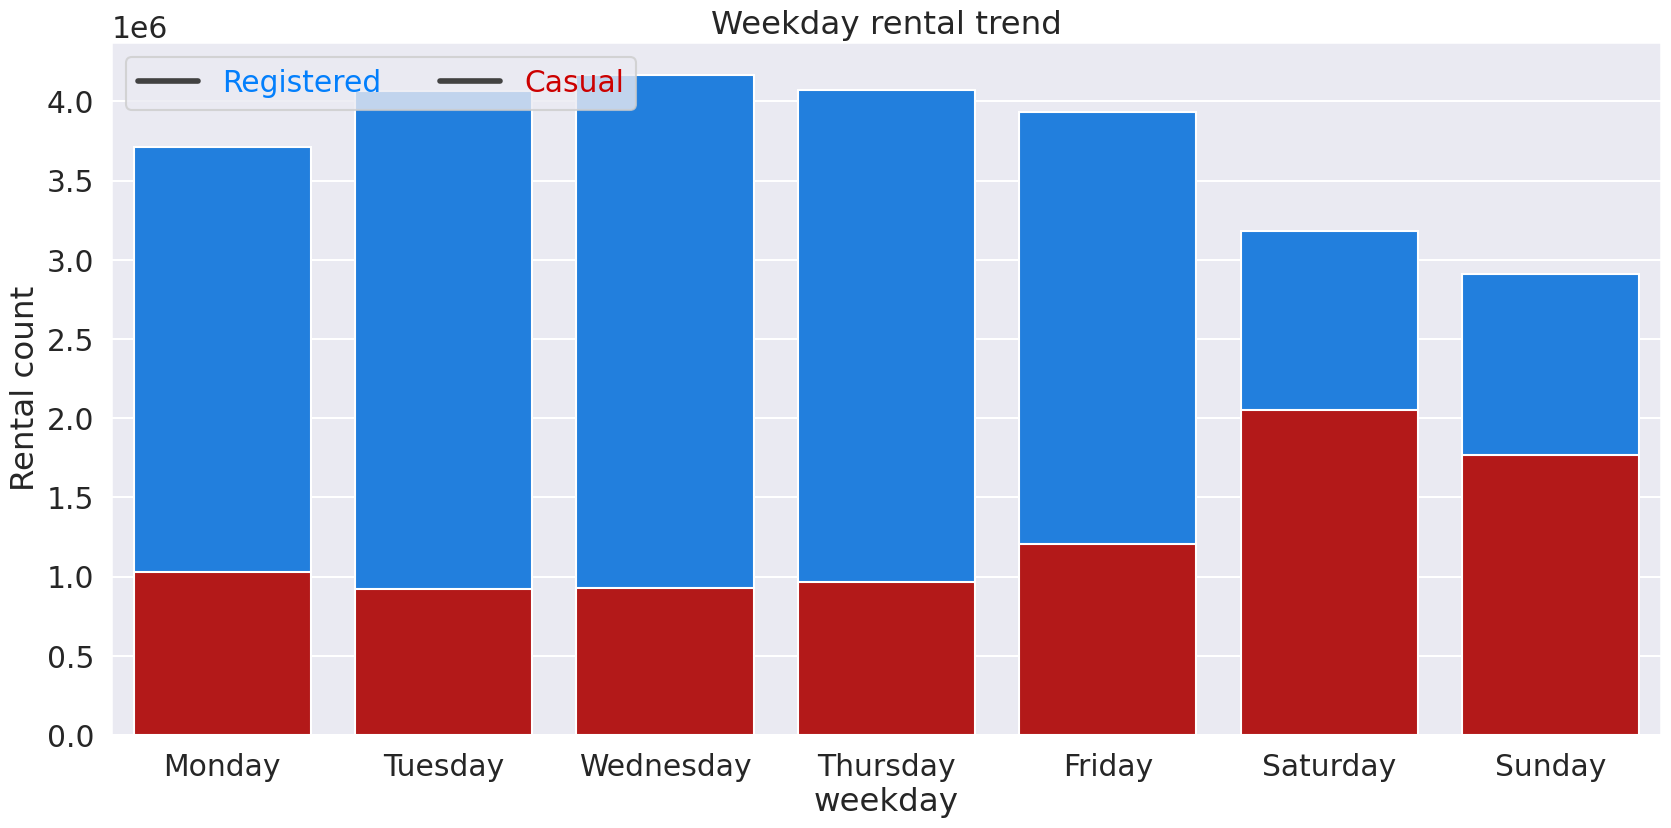

In [41]:
sns.set(rc={'figure.figsize':(20,9)})
sns.set_context('talk', font_scale=1.3)


bar1 = sns.barplot(x="weekday", y="member_trips", data=b1, color=color_reg, order=weekday_order)
bar2 = sns.barplot(x="weekday", y="casual_trips", data=b2,  color=color_cas, order=weekday_order)

# set the legend with colors
bar2.legend(
    labels={'Registered': color_reg, 'Casual': color_cas},
    loc='upper left',
    ncol=2
)
# set ber2 legend to specific colors
bar2.legend_.get_texts()[0].set_color(color_reg)
bar2.legend_.get_texts()[1].set_color(color_cas)
#set y axis label
bar2.set_ylabel('Rental count')
bar2.set_title('Weekday rental trend')

# Trips by weather conditions

In [42]:
b_by_weather = bg.groupby(['wmo_description'])['total_trips'].sum().reset_index()

In [43]:
display(b_by_weather)

wmo_description  total_trips
0             dry     30453346
1            rain      4158339
2            snow       301241

([<matplotlib.patches.Wedge at 0x7f06ca75f490>,
 [Text(-1.0126140313944876, 0.42966594398788915, 'dry'),
  Text(1.0005966864680251, -0.45695324818761157, 'rain'),
  Text(1.0995959083402362, -0.029813392316391293, 'snow')],
 [Text(-0.552334926215175, 0.23436324217521223, '87.2%'),
  Text(0.5457800108007409, -0.24924722628415175, '11.9%'),
  Text(0.5997795863674015, -0.016261850354395247, '0.9%')])

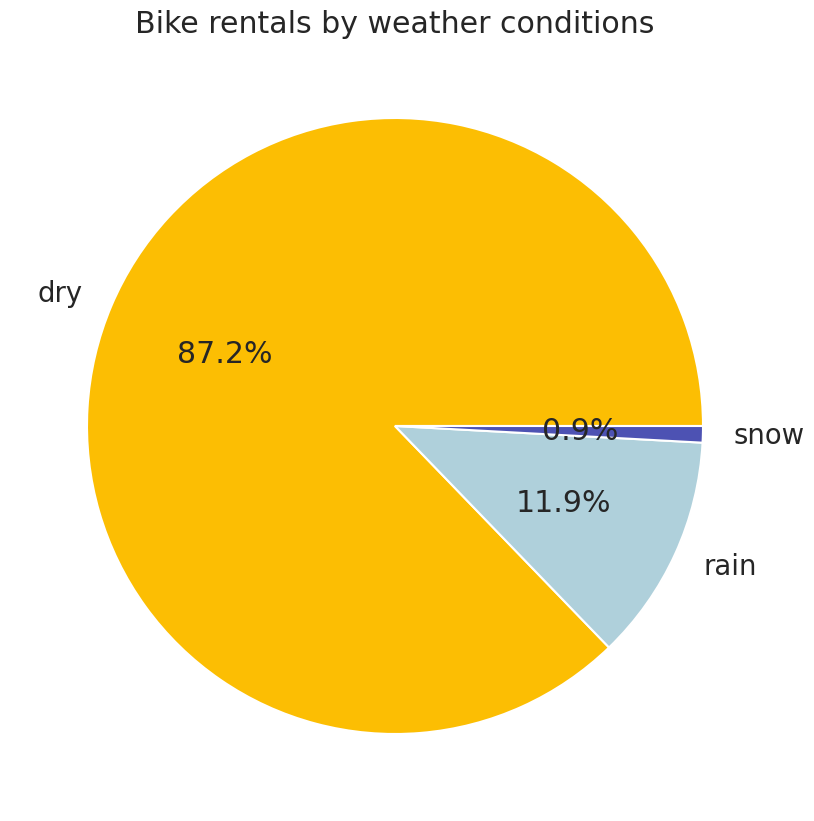

In [44]:

sns.set(rc={'figure.figsize':(15,10)})
sns.set_context('talk', font_scale=1.2)
colors = weather_color_palette

plt.title('Bike rentals by weather conditions')
plt.pie(
    b_by_weather['total_trips'],
    labels=b_by_weather['wmo_description'],
    autopct='%1.1f%%',
    colors=weather_color_palette
)


# Trips by season

In [45]:
b_by_season = bg.groupby(['season'])['total_trips'].sum().reset_index()

In [46]:
display(b_by_season)

season  total_trips
0       1      5416588
1       2      8696535
2       3     11122543
3       4      9677260

([<matplotlib.patches.Wedge at 0x7f06caaccee0>,
 [Text(0.971906600077053, 0.5151675074445821, 'winter'),
  Text(-0.20402590998837053, 1.0809132379860178, 'spring'),
  Text(-1.013528686973106, -0.4275039189090224, 'summer'),
  Text(0.708640149015665, -0.8413258222609455, 'fall')],
 [Text(0.5301308727693016, 0.2810004586061356, '15.5%'),
  Text(-0.11128685999365664, 0.5895890389014642, '24.9%'),
  Text(-0.5528338292580578, -0.23318395576855763, '31.9%'),
  Text(0.38653099037218086, -0.4589049939605157, '27.7%')])

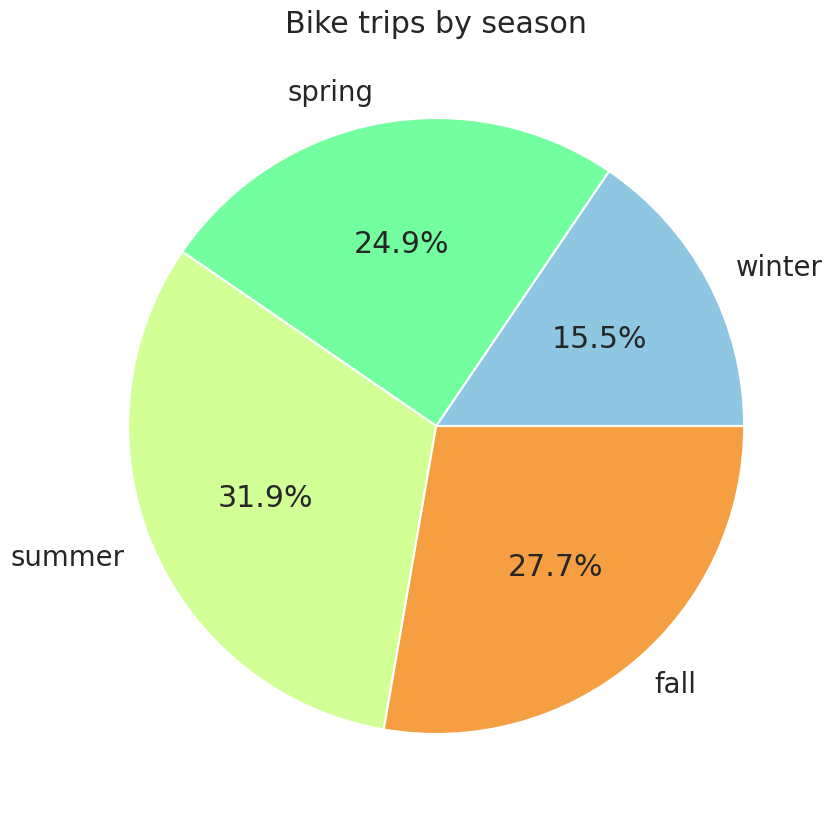

In [47]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_context('talk', font_scale=1.2)

plt.title('Bike trips by season')
plt.pie(
    b_by_season['total_trips'],
    labels=['winter', 'spring', 'summer', 'fall'],
    colors=season_color_palette, autopct='%1.1f%%'
)


# Trips by temperature

In [48]:
b1 = bg.groupby(['temp'])['member_trips'].sum().reset_index()
b2 = bg.groupby(['temp'])['casual_trips'].sum().reset_index()

In [49]:
display(b1)
display(b2)

temp  member_trips
0   -18.100000             6
1   -17.500000             3
2   -17.300000            14
3   -17.200000            88
4   -16.900000            37
..         ...           ...
529  36.900000           275
530  37.000000           563
531  37.300000          1176
532  37.400000           431
533  37.500000           816

[534 rows x 2 columns]

temp  casual_trips
0   -18.100000             0
1   -17.500000             0
2   -17.300000             7
3   -17.200000            12
4   -16.900000             4
..         ...           ...
529  36.900000           247
530  37.000000           131
531  37.300000           453
532  37.400000           100
533  37.500000           313

[534 rows x 2 columns]

Text(0, 0.5, 'Trip count')

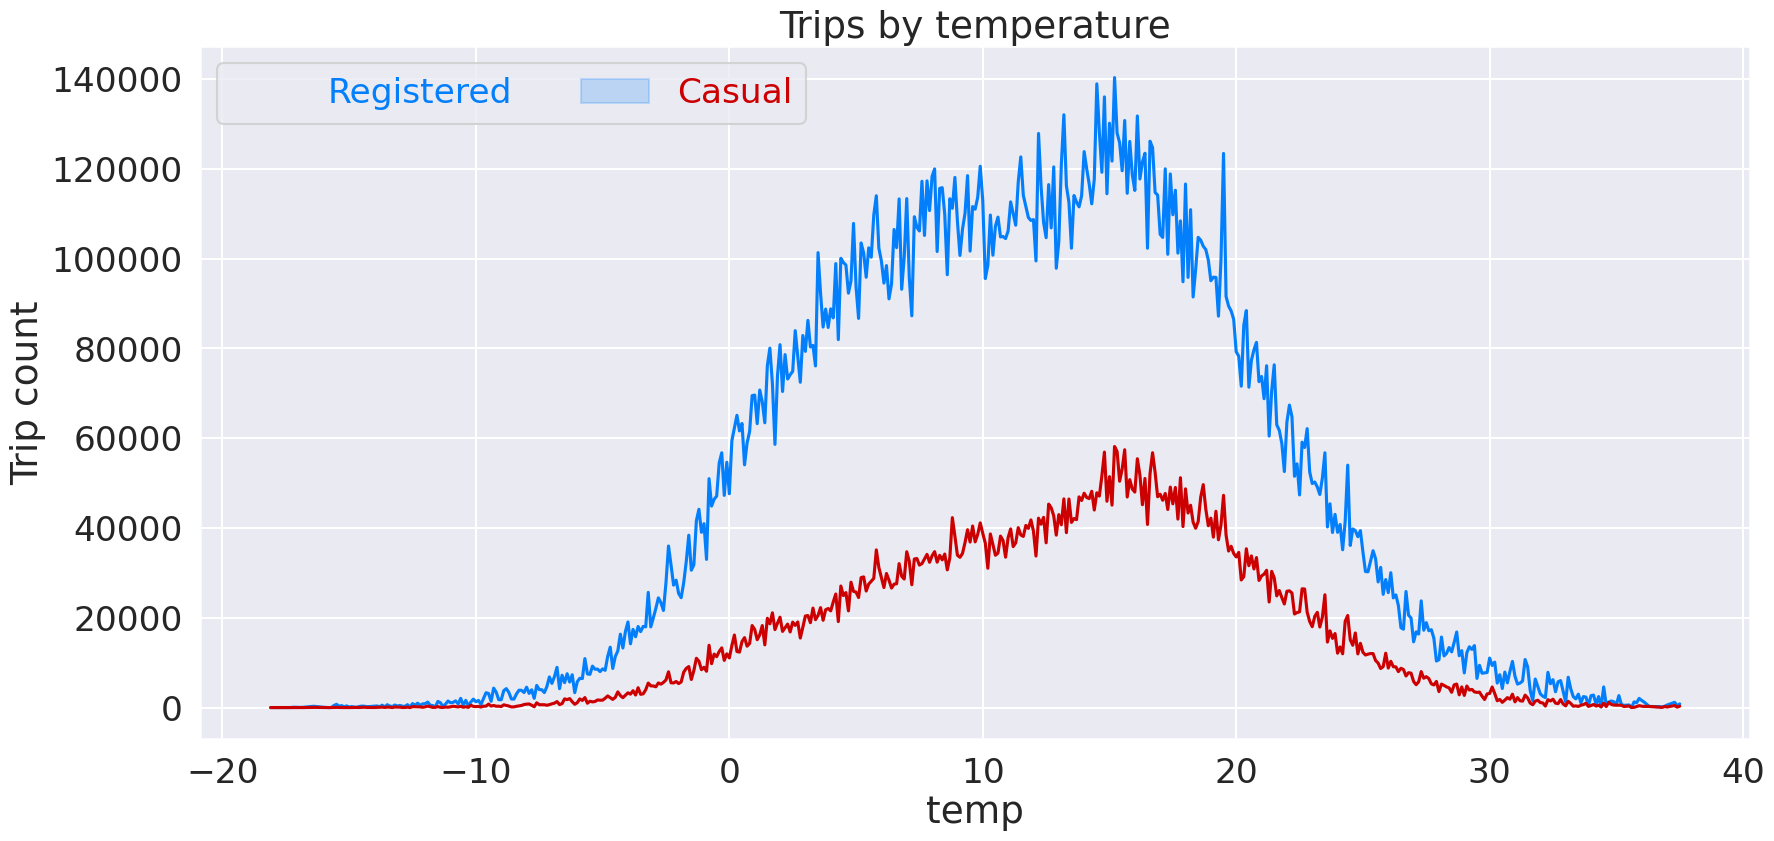

In [50]:
sns.set(rc={'figure.figsize':(20,9)})
sns.set_context('talk', font_scale=1.5)
# lineplot by temperature
plt1 = sns.lineplot(x="temp", y='member_trips', data=b1, color=color_reg)
plt2 = sns.lineplot(x="temp", y='casual_trips', data=b2, color=color_cas)

plt2.legend(
    labels={'Registered': color_reg, 'Casual': color_cas},
    loc='upper left',
    ncol=2
)
# set ber2 legend to specific colors
plt2.legend_.get_texts()[0].set_color(color_reg)
plt2.legend_.get_texts()[1].set_color(color_cas)

# remove lines from legend
plt2.legend_.get_lines()[0].set_linewidth(0)

plt2.set_title('Trips by temperature')
plt2.set_ylabel('Trip count')

# Mean trip duration by temperature

In [51]:
bg['mean_member_trip_duration'] =  bg['total_member_trip_duration'] / bg['member_trips']
bg['mean_casual_trip_duration'] =  bg['total_casual_trip_duration'] / bg['casual_trips']
bg['mean_trip_duration'] = bg['total_trips'] / bg['total_trip_duration']
b1 = bg.groupby(['temp'])['mean_member_trip_duration'].mean().reset_index()
b2 = bg.groupby(['temp'])['mean_casual_trip_duration'].mean().reset_index()

In [52]:
display(b1)
display(b2)

temp  mean_member_trip_duration
0   -18.100000                 665.166667
1   -17.500000                 560.000000
2   -17.300000                 592.857143
3   -17.200000                 574.750000
4   -16.900000                1436.567568
..         ...                        ...
529  36.900000                 875.981818
530  37.000000                 992.161634
531  37.300000                 924.751507
532  37.400000                1428.162413
533  37.500000                 681.036765

[534 rows x 2 columns]

temp  mean_casual_trip_duration
0   -18.100000                        NaN
1   -17.500000                        NaN
2   -17.300000                5728.428571
3   -17.200000                 500.916667
4   -16.900000                 511.750000
..         ...                        ...
529  36.900000                2264.765182
530  37.000000                3083.656489
531  37.300000                1610.784412
532  37.400000                2612.150000
533  37.500000                1949.725240

[534 rows x 2 columns]

Text(0, 0.5, 'Mean trip duration (seconds)')

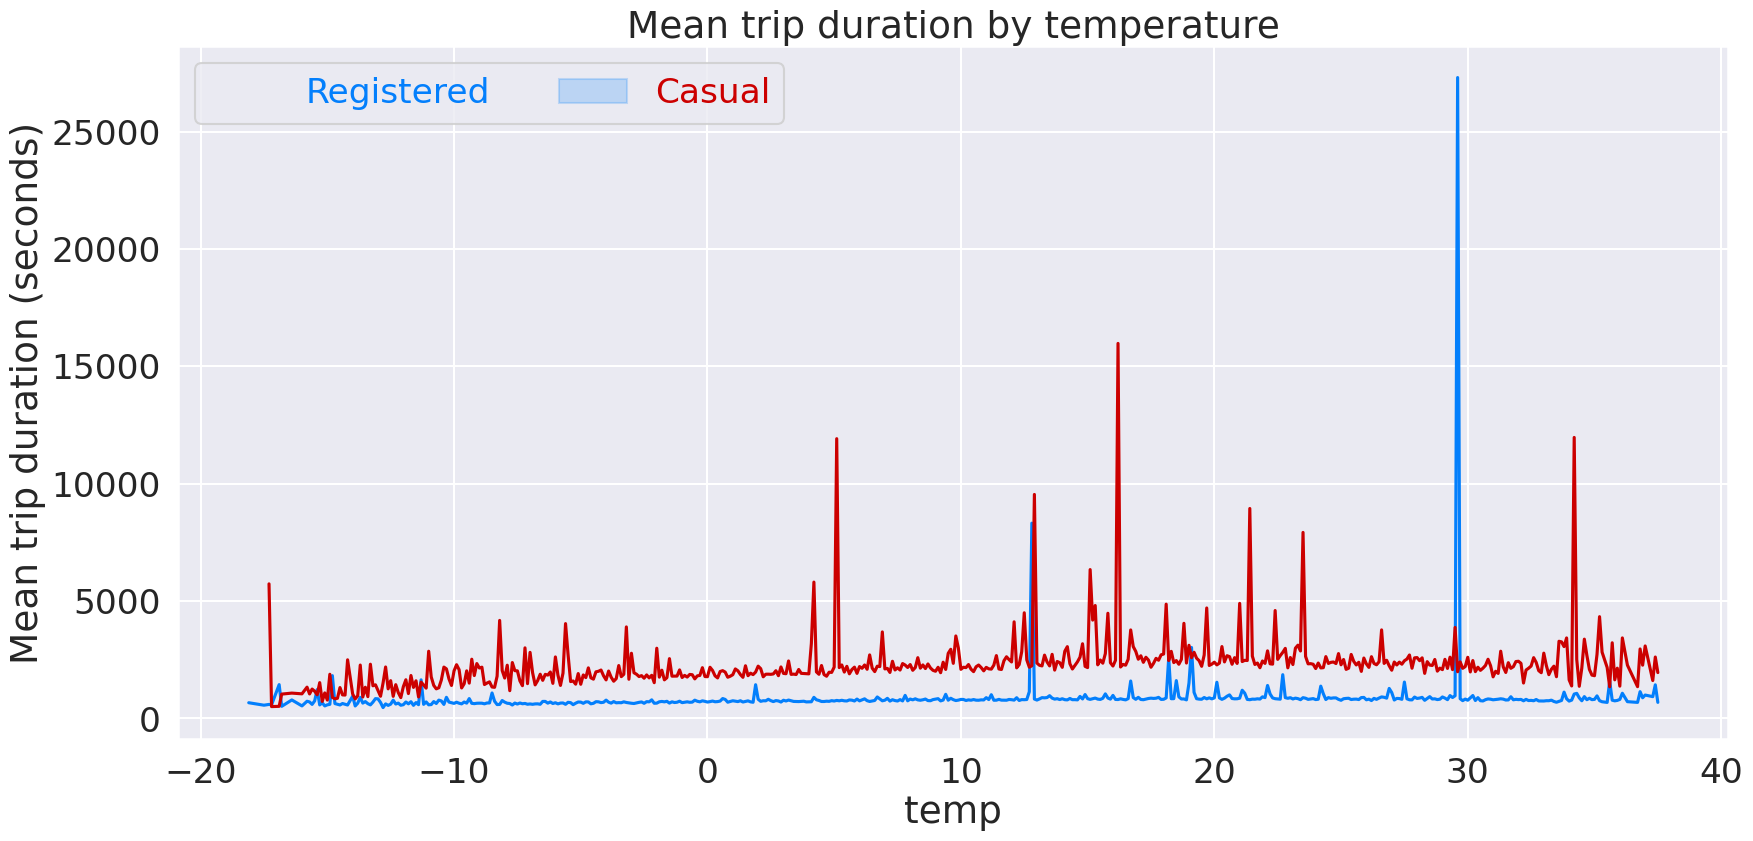

In [53]:
sns.set(rc={'figure.figsize':(20,9)})
sns.set_context('talk', font_scale=1.5)
# lineplot by temperature
plt1 = sns.lineplot(x="temp", y='mean_member_trip_duration', data=b1, color=color_reg)
plt2 = sns.lineplot(x="temp", y='mean_casual_trip_duration', data=b2, color=color_cas)

plt2.legend(
    labels={'Registered': color_reg, 'Casual': color_cas},
    loc='upper left',
    ncol=2
)
# set ber2 legend to specific colors
plt2.legend_.get_texts()[0].set_color(color_reg)
plt2.legend_.get_texts()[1].set_color(color_cas)

# remove lines from legend
plt2.legend_.get_lines()[0].set_linewidth(0)

plt2.set_title('Mean trip duration by temperature')
plt2.set_ylabel('Mean trip duration (seconds)')

# YOY growth

Text(0.5, 1.0, 'YoY growth in bike rentals')

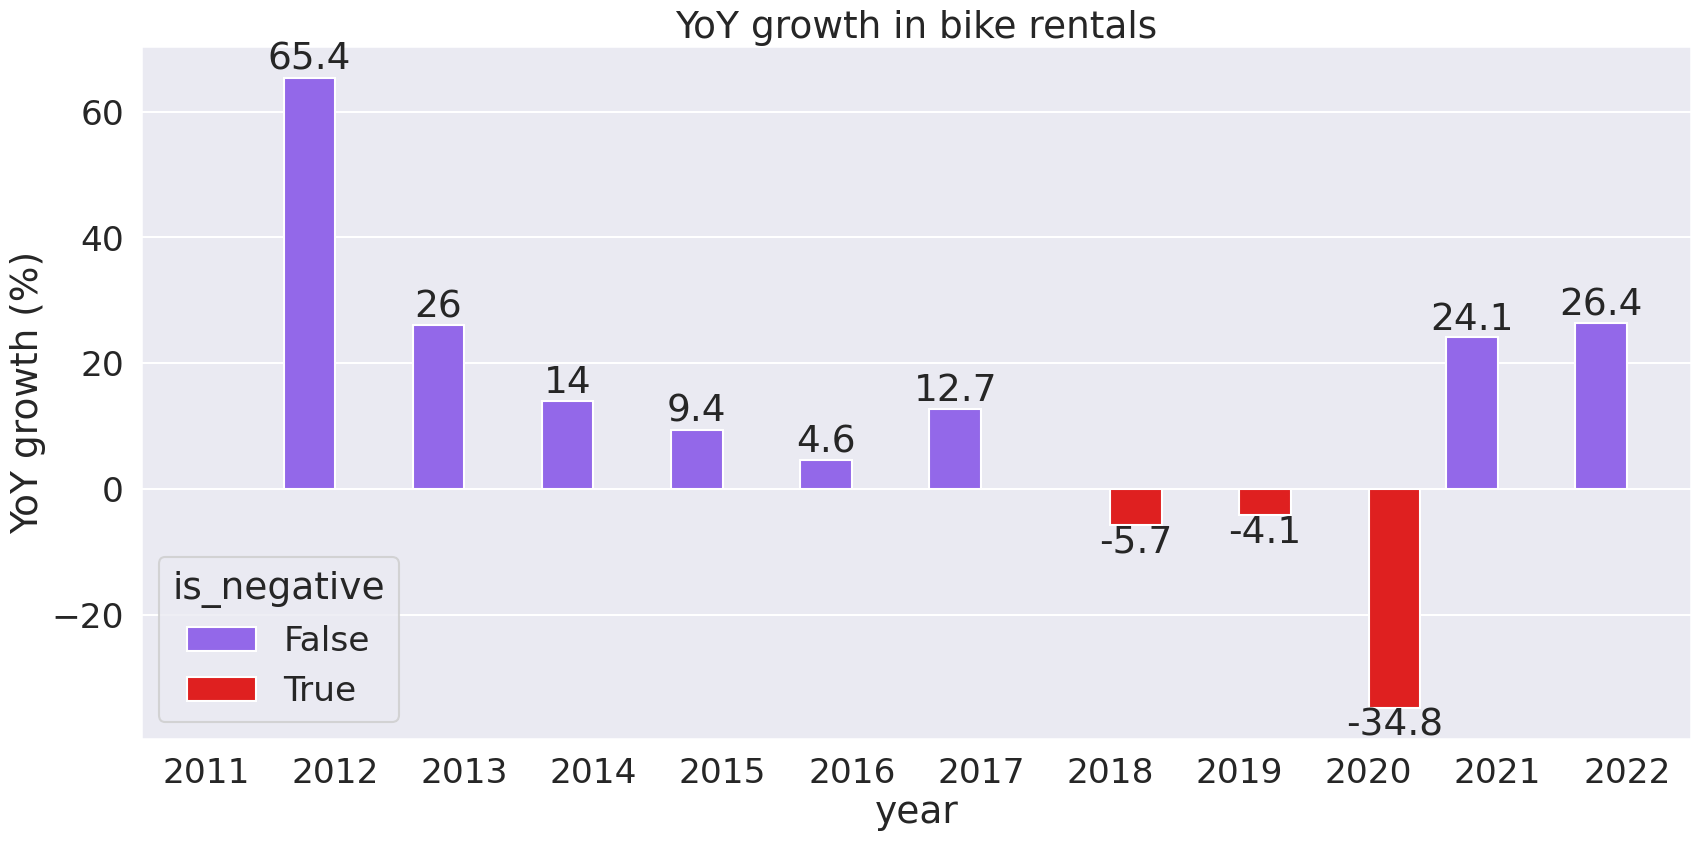

In [54]:
import math
trips_by_year = bg[(bg['year'] >= 2011) & (bg['year'] <= 2022)].groupby(['year'])['total_trips'].sum().reset_index()

trips_by_year['pct_yoy'] = round(trips_by_year['total_trips'].pct_change() * 100, 1)
trips_by_year['is_negative'] = trips_by_year['pct_yoy'] <= 0


plt = sns.barplot(x="year", y="pct_yoy", data=trips_by_year, hue='is_negative', palette=[color_general, 'red'])

for i in plt.containers:
    plt.bar_label(i,)

plt.set_ylabel('YoY growth (%)')
plt.set_title('YoY growth in bike rentals')

# mean trips by temperature

Text(0, 0.5, 'Mean trips per hour')

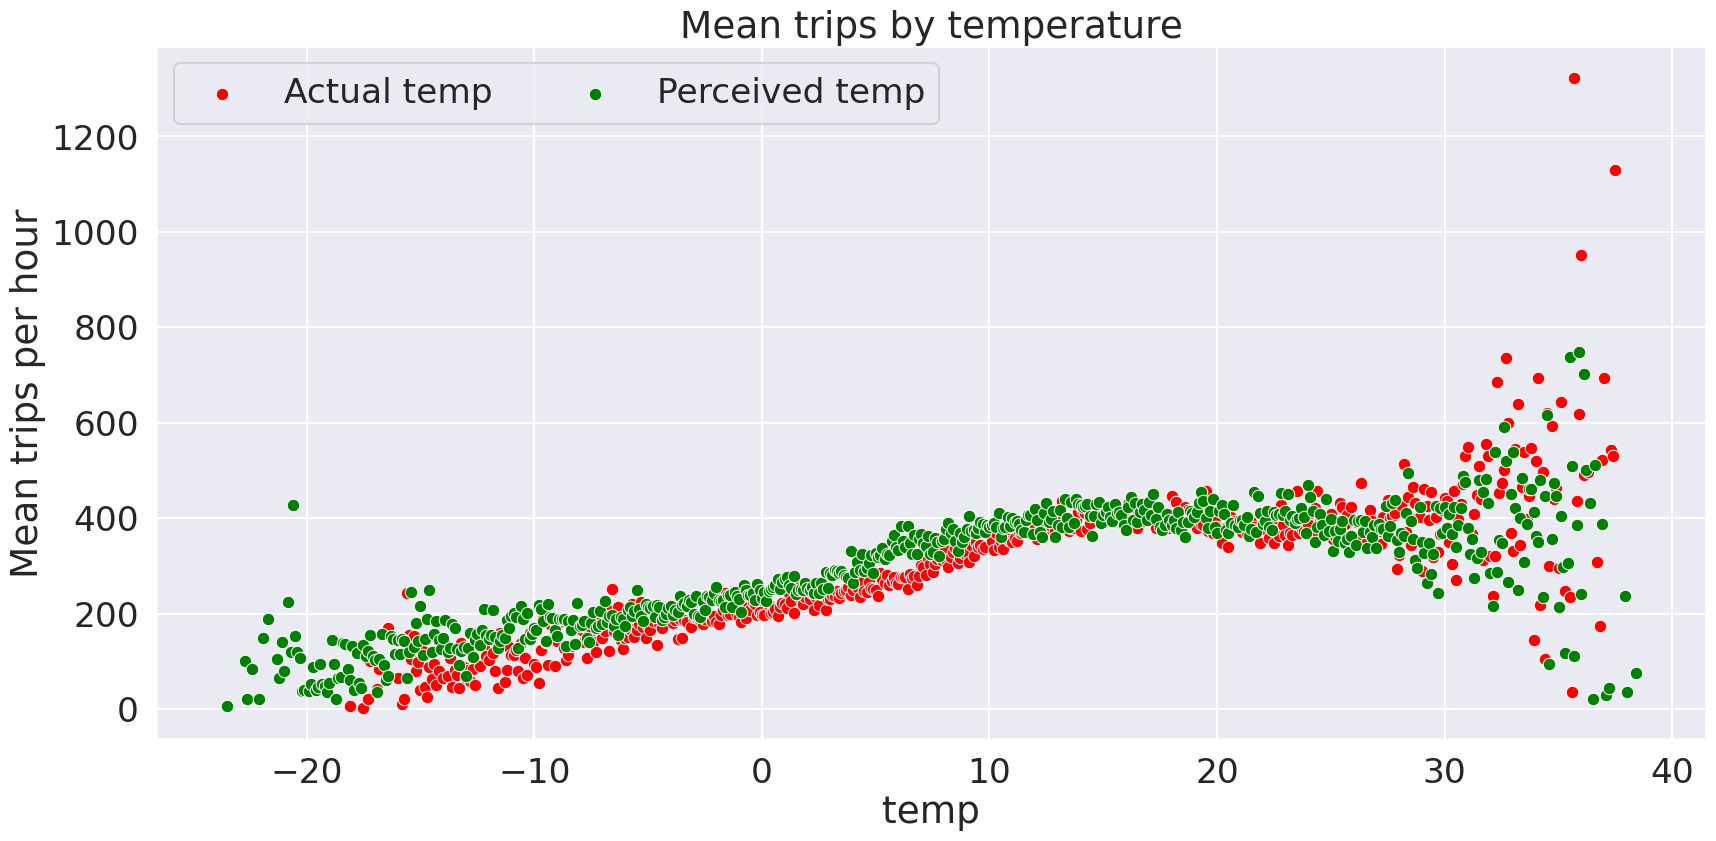

In [69]:
b1 = bg.groupby(['temp'])['total_trips'].mean().reset_index()
b2 = bg.groupby(['atemp'])['total_trips'].mean().reset_index()
plt1 = sns.scatterplot(x="temp", y="total_trips", data=b1, color='red')
plt2 = sns.scatterplot(x="atemp", y="total_trips", data=b2, color='green')

plt2.legend(
    labels={'Actual temp': 'red', 'Perceived temp': 'green'},
    loc='upper left',
    ncol=2
)

plt2.set_title('Mean trips by temperature')
plt2.set_ylabel('Mean trips per hour')

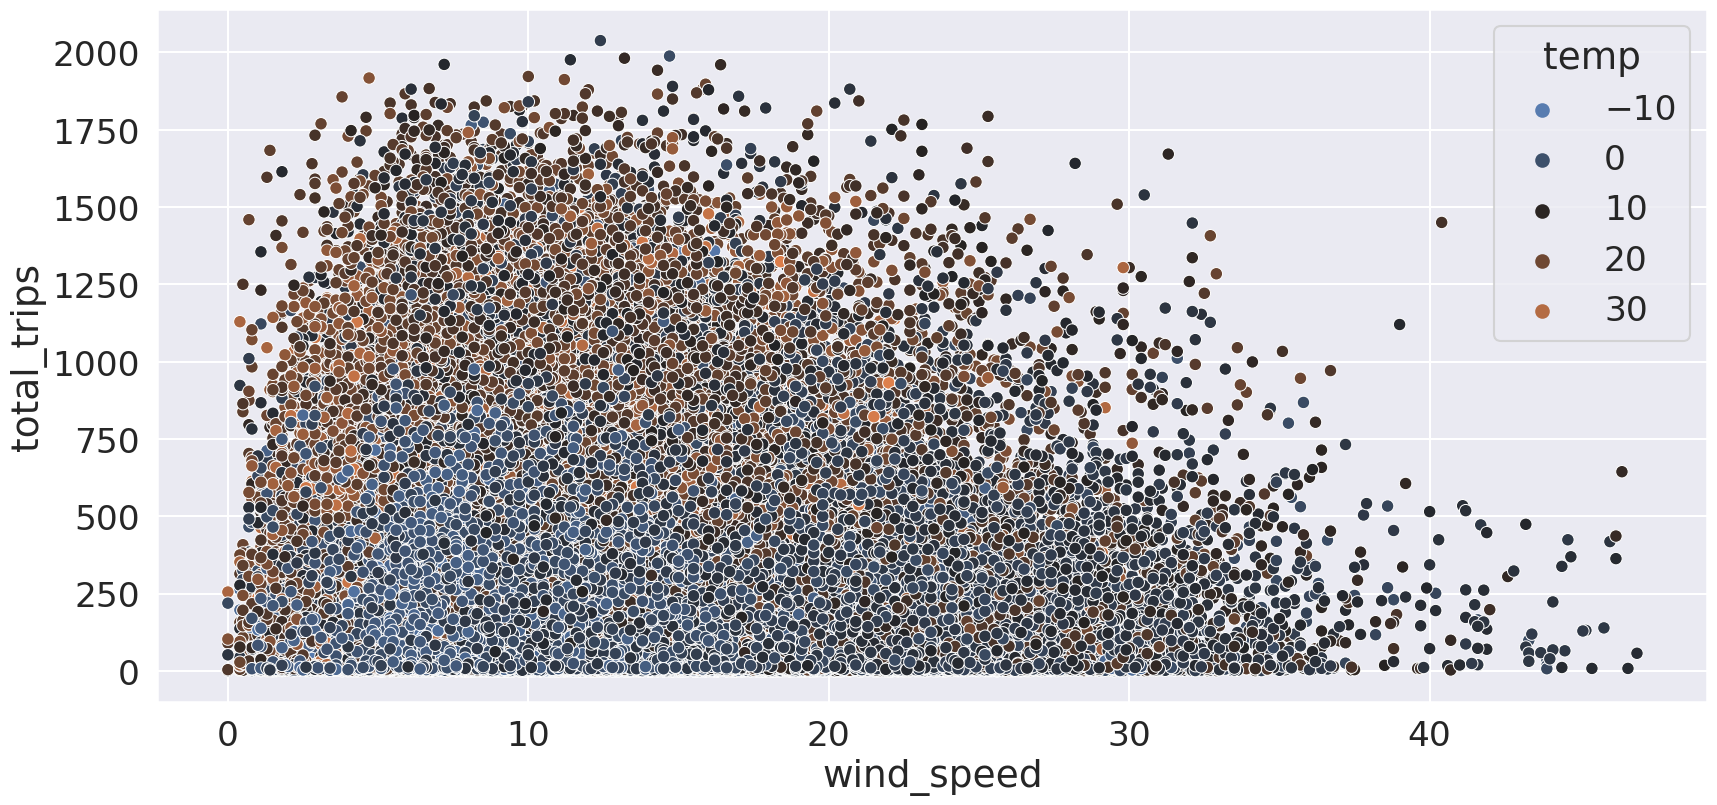

In [61]:
cw_palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

sns.set(rc={'figure.figsize':(20,9)})
sns.set_context('talk', font_scale=1.5)

plt = sns.scatterplot(x="wind_speed", y="total_trips", hue="temp", data=bg,  palette=cw_palette)

# Trips over time

In [ ]:
cw_palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
plt = sns.scatterplot(x="time", y="total_trips", data=bg, hue='temp', palette=cw_palette)

plt.xaxis.set_major_locator(plt.MaxNLocator(30))

plt.set_title('Trips over time')
plt.set_ylabel('Trip count per hour')

In [ ]:
b1 = bg.groupby(['year', 'month'])['member_trips'].sum().reset_index()
b2 = bg.groupby(['year', 'month'])['casual_trips'].sum().reset_index()

In [ ]:

display(b1)
display(b2)

In [ ]:
sns.set(rc={'figure.figsize':(16,9)})
sns.set_context('talk', font_scale=1.5)

year_and_month = b1['year'].astype(str)+"-"+b1['month'].astype(str)

fig, ax = plt.subplots()

plt1 = sns.lineplot(x=year_and_month, y='member_trips', data=b1, color=color_reg)
plt2 = sns.lineplot(x=year_and_month, y='casual_trips', data=b2, color=color_cas)

plt2.legend(
    labels={'Registered': color_reg, 'Casual': color_cas},
    loc='upper left',
    ncol=2
)
# set ber2 legend to specific colors
plt2.legend_.get_texts()[0].set_color(color_reg)
plt2.legend_.get_texts()[1].set_color(color_cas)

# remove lines from legend
plt2.legend_.get_lines()[0].set_linewidth(0)

ax.xaxis.set_major_locator(plt.MaxNLocator(30))

plt.xticks(rotation=90)
plt.tight_layout()

plt2.set_ylabel('Rental count')
plt2.set_title('Trip count over time')

# trip duration over time

In [ ]:
b1 = bg.groupby(['year', 'month'])['member_trips'].mean().reset_index()
b2 = bg.groupby(['year', 'month'])['casual_trips'].mean().reset_index()

In [ ]:
display(b1)
display(b2)

In [ ]:
sns.set(rc={'figure.figsize':(16,9)})
sns.set_context('talk', font_scale=1.5)

year_and_month = b1['year'].astype(str)+"-"+b1['month'].astype(str)

fig, ax = plt.subplots()

plt1 = sns.lineplot(x=year_and_month, y='member_trips', data=b1, color=color_reg)
plt2 = sns.lineplot(x=year_and_month, y='casual_trips', data=b2, color=color_cas)

plt2.legend(
    labels={'Registered': color_reg, 'Casual': color_cas},
    loc='upper left',
    ncol=2
)
# set ber2 legend to specific colors
plt2.legend_.get_texts()[0].set_color(color_reg)
plt2.legend_.get_texts()[1].set_color(color_cas)

# remove lines from legend
plt2.legend_.get_lines()[0].set_linewidth(0)

ax.xaxis.set_major_locator(plt.MaxNLocator(30))

plt.xticks(rotation=90)
plt.tight_layout()

plt2.set_ylabel('Duration')
plt2.set_title('Mean trip duration over time')

# CO2 emissions
The average passenger vehicle in US emits about 251 grams of CO2 per km

Currently, Capital Bikeshare uses an average speed of roughly 12.07 KPH to estimate distances
https://mobilitylab.org/2016/06/21/capital-bikeshare-gps-data-trips/

In [ ]:
display(bg.head())
b1 = bg.groupby(['year', 'month'])['total_member_co2_saved'].sum().reset_index()
b2 = bg.groupby(['year', 'month'])['total_casual_co2_saved'].sum().reset_index()

In [ ]:
display(b1)
display(b2)

In [ ]:
sns.set(rc={'figure.figsize':(16,9)})
sns.set_context('talk', font_scale=1.5)

year_and_month = b1['year'].astype(str)+"-"+b1['month'].astype(str)

fig, ax = plt.subplots()

plt1 = sns.lineplot(x=year_and_month, y='total_member_co2_saved', data=b1, color=color_reg)
plt2 = sns.lineplot(x=year_and_month, y='total_casual_co2_saved', data=b2, color=color_cas)

plt2.legend(
    labels={'Registered': color_reg, 'Casual': color_cas},
    loc='upper left',
    ncol=2
)
# set ber2 legend to specific colors
plt2.legend_.get_texts()[0].set_color(color_reg)
plt2.legend_.get_texts()[1].set_color(color_cas)

# remove lines from legend
plt2.legend_.get_lines()[0].set_linewidth(0)

ax.xaxis.set_major_locator(plt.MaxNLocator(30))

plt.xticks(rotation=90)
plt.tight_layout()

plt2.set_ylabel('CO2 saved (kg)')
plt2.set_title('CO2 saved over time')

In [ ]:
display(bg.head())

In [ ]:
sns.set(rc={'figure.figsize': (20, 9)})
sns.set_context('talk', font_scale=1.2)

sns.stripplot(
    x='year', y='total_trips', data=bg,
    hue='wmo_description',
    jitter=True,
    dodge=True,
    palette=weather_color_palette
)#.set(ylim=(0.98, 1.012))

# Weather distrebution in washington DC

In [ ]:
ds = bg.groupby(['wmo_description'])['time'].count().reset_index()
display(ds)

In [ ]:

sns.set(rc={'figure.figsize': (15, 10)})
sns.set_context('talk', font_scale=1.2)
colors = weather_color_palette

plt.title('Weather days')
plt.pie(ds['time'], labels=ds['wmo_description'], colors=colors, autopct='%1.1f%%')

# Weather by years

In [ ]:
ds = bg[(bg['year'] >= 2011) & (bg['year'] <= 2022)].groupby(['year', 'wmo_description'])['time'].count().reset_index()
display(ds)

In [ ]:
sns.set(rc={'figure.figsize': (20, 9)})
sns.set_context('talk', font_scale=1.2)
colors = weather_color_palette

ds['time'] = round(ds['time'] / 24)

plt = sns.barplot(data=ds, y='time', x='year', hue='wmo_description', palette=weather_color_palette)
plt.set_ylabel('days')
plt.set_title('Weather in Washington')

# trips by weather by year

In [ ]:
ds = bg[(bg['year'] >= 2011) & (bg['year'] <= 2022)].groupby(['year', 'wmo_description'])['total_rides'].mean().reset_index()
display(ds)

In [ ]:
sns.set(rc={'figure.figsize': (20, 9)})
sns.set_context('talk', font_scale=1.2)
colors = weather_color_palette

ds['time'] = round(ds['total_rides'] / 24)

plt = sns.barplot(data=ds, y='total_rides', x='year', hue='wmo_description', palette=weather_color_palette)
plt.set_ylabel('mean trips per hour')
plt.set_title('Mean trips per hour in different weather')

In [ ]:
bg['mean_ride_duration'] = bg['total_ride_duration'] / bg['total_rides']
ds = bg[(bg['year'] >= 2011) & (bg['year'] <= 2022)].groupby(['year', 'wmo_description'])['mean_ride_duration'].mean().reset_index()
display(ds)

In [ ]:
sns.set(rc={'figure.figsize': (15, 10)})
sns.set_context('talk', font_scale=1.2)
colors = weather_color_palette

plt = sns.barplot(data=ds, y='mean_ride_duration', x='year', hue='wmo_description', palette=weather_color_palette)
plt.set_ylabel('mean ride duration (s)')
plt.set_title('Mean ride duration in different weather')

# bike durability

In [ ]:
bns.shape

In [ ]:
plt = sns.histplot(data=bns, x='total_trip_count', multiple='stack', color=color_general)
plt.set_title('Total trips by single bike')
plt.set_ylabel('trip count')
plt.set_xlabel('bike count')

In [ ]:
plt = sns.histplot(data=bns, x='days_active', multiple='stack', color=color_general)
plt.set_title('Days single bike is active')
plt.set_ylabel('days_active')
plt.set_xlabel('bike count')

Text(0, 0.5, 'days_active')

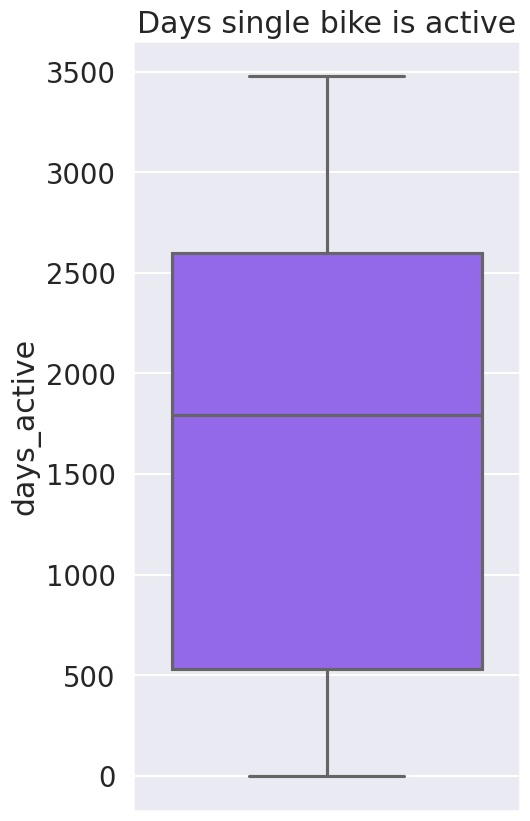

In [75]:
sns.set(rc={'figure.figsize': (5, 10)})
sns.set_context('talk', font_scale=1.2)

plt = sns.boxplot(data=bns, y='days_active', color=color_general)
plt.set_title('Days single bike is active')
plt.set_ylabel('days_active')

Text(0.5, 0, 'total duration')

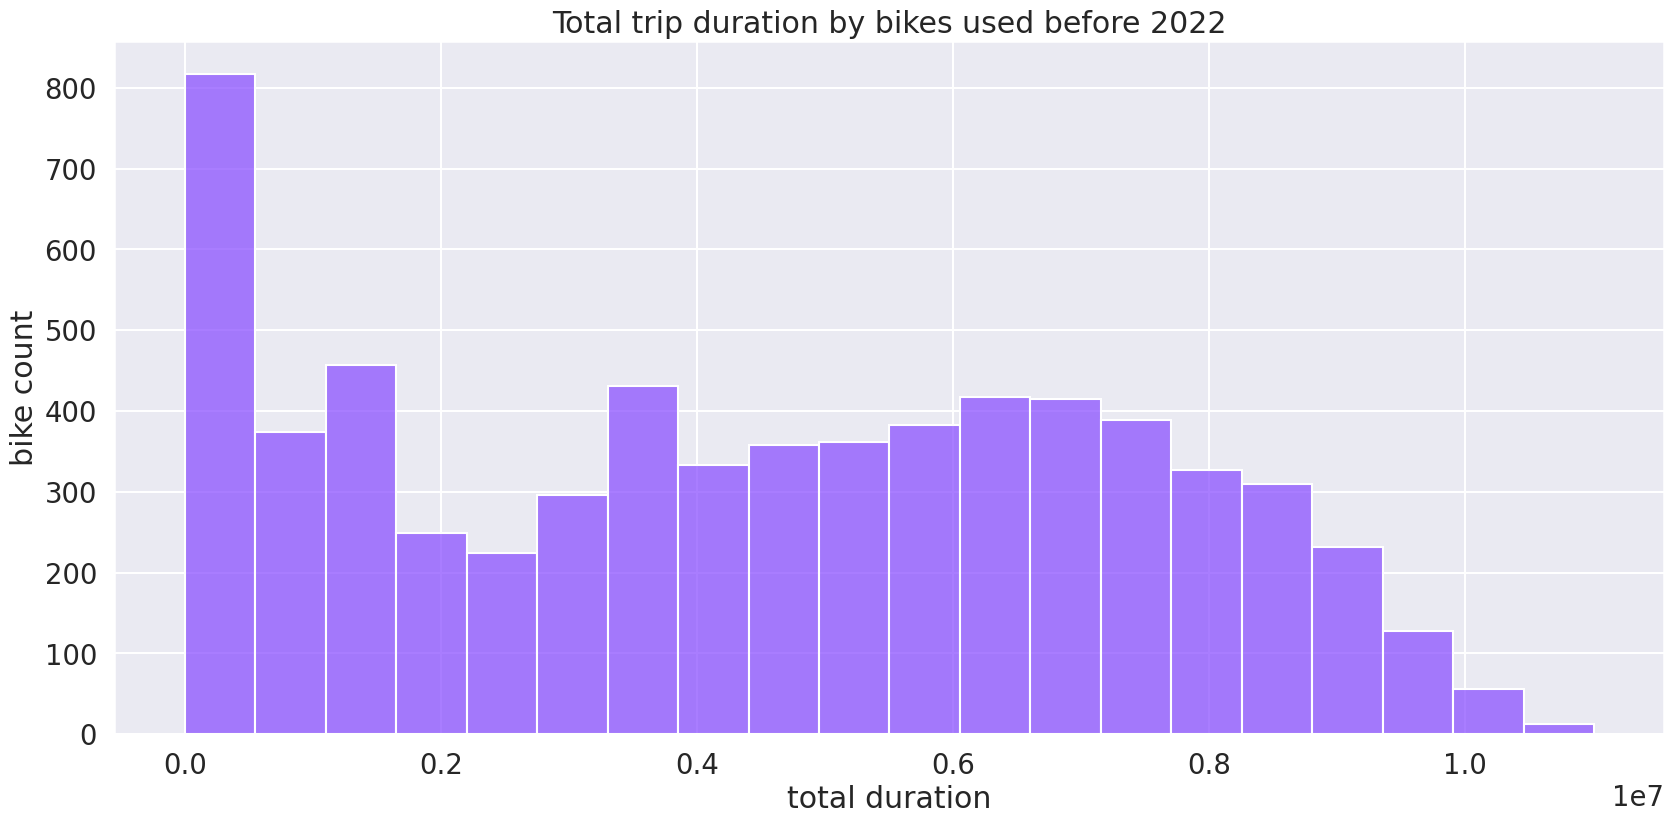

In [71]:
sns.set(rc={'figure.figsize': (20, 9)})
sns.set_context('talk', font_scale=1.2)

b1 = bns[bns['last_trip_date'] <= '2022-01-01']
plt = sns.histplot(data=bns, x='total_duration', multiple='stack', color=color_general)
plt.set_title('Total trip duration by bikes used before 2022')
plt.set_ylabel('bike count')
plt.set_xlabel('total duration')

<AxesSubplot: ylabel='total_duration'>

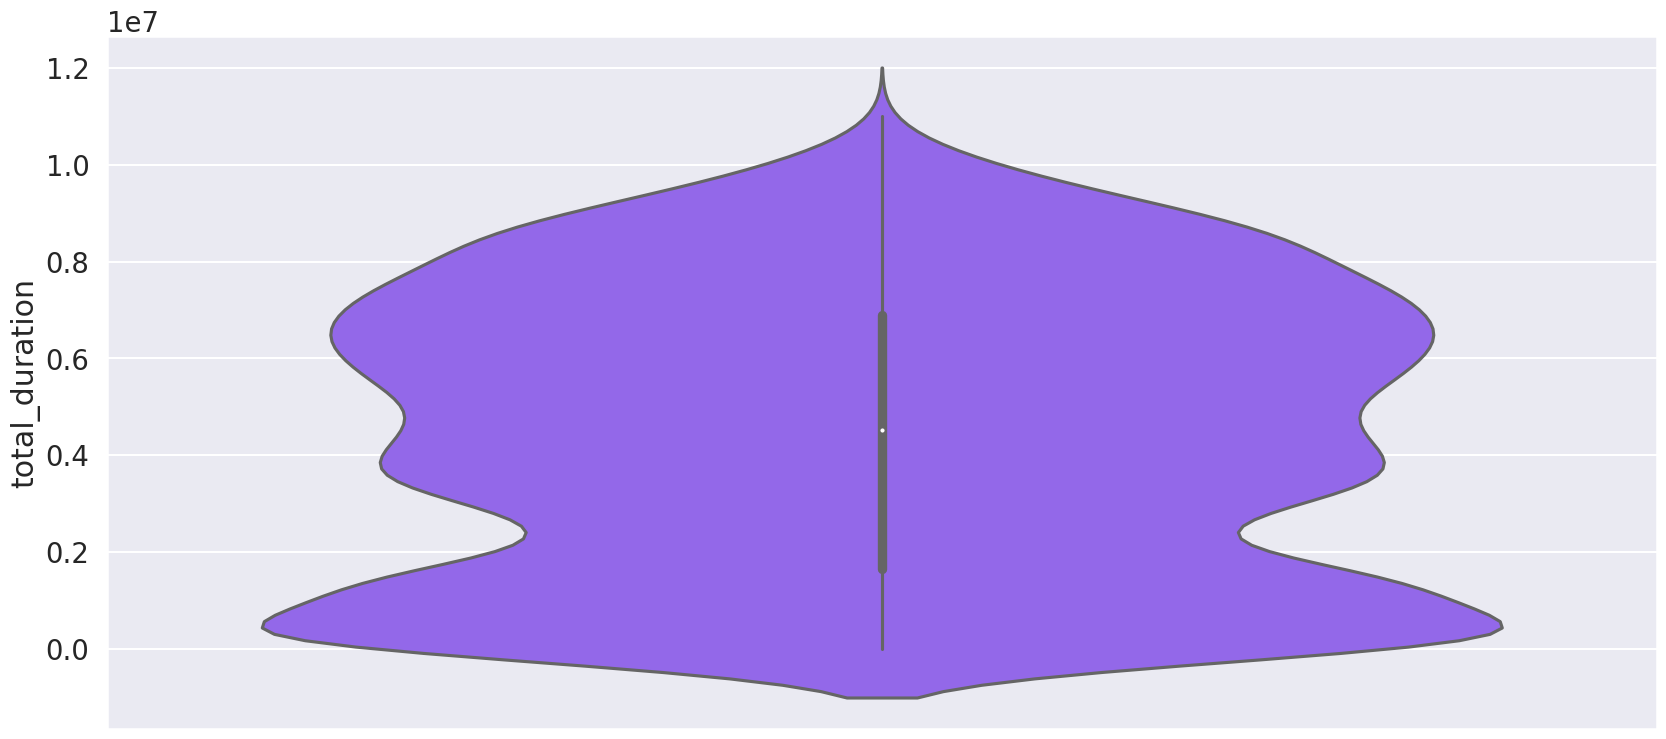

In [72]:
sns.violinplot(data=bns, y='total_duration', color=color_general)